## PREDICTING PROGRESSIONS AND CLINICAL SUBTYPES OF ALZHEIMER'S DISEASE USING MACHINE LEARNING
### Vipul Satone
#### Submitted in partial fulfillment of the requirements for the degree of Master of Science in Industrial and Enterprise Systems Engineering in the Graduate College of the
#### University of Illinois at Urbana-Champaign, 2019

#### ABSTRACT
Alzheimer's disease is a degenerative brain disease which impairs person's ability perform day to day activities. Research has shown AD to be a heterogeneous condition, having high variation in terms of the symptoms and disease progression rate. Treating Alzheimer's disease (AD) is especially challenging due to theses variations present in the disease progression stages. The clinical symptoms of AD show marked variability in terms of patients' age, disease span, progression velocity and types of memory, cognitive and depression related features. Hence, the idea of personalized clinical care, with individualized risk, progression and prediction related patient advice in AD is narrow. This facilitates the yet unfulfilled need for an early prediction of the disease course to assist its treatment and tailor therapy options to the progression rate. Additionally, there are ramifcations in clinical trial design when considering the high heterogeneity of disease manifestation and progression.


Recent developments in machine learning techniques provide a huge potential, not only to predict onset and progression of Alzheimer's disease but also to classify the disease into different etiological subtypes. The advancement of these prediction models have the potential to impact clinical decision making and improve healthcare resource allocation. It will also lead to development of personalized clinical care and counseling for patients, hopefully reducing AD treatment costs. 

The suggested work clusters patients in distinct and multifaceted progression subgroups of Alzheimer's disease and discusses an approach to predict the progression stage from baseline diagnosis through the implementation of machine learning techniques. By applying machine learning algorithms on the extensive clinical observations available in the Alzheimer's Disease Neuroimaging Initiative (ADNI) dataset, we parse the progression space for the Alzheimer’s disease into low, moderate and high disease progressors. This work suggests that the myriad of clinically reported symptoms we summarize in the Alzheimer's Disease progression space correspond directly to memory and cognition measurements classically used to monitor disease onset and progression. The proposed work concludes notably accurate prediction of disease progression after four years from the first 12 months of  post-diagnosis data (area under receiver operating characteristic (ROC) curve of 0.90 $\pm$ 0.02 for Controls, 0.96 $\pm$  0.04 for High rate, 0.90 $\pm$  0.04 for Moderate rate 0.83 $\pm$  0.06 for Low rate). We validate our model through five-fold cross-validation to obtain robust prediction of membership into these progression subtypes.

These machine learning techniques will assist the medical practitioners to classify different progression rates within patients and allow for more efficient an unique care delivery. With an additional  information about the onset rate of AD at hand, doctors may alter their treatments to better suit the patients. The predictive tests discussed in this report not only allow for early detection but also facilitate the characterization of distinct disease subtypes relating to trajectories of disease progression. This will lead to an improved clinical trial design and reducing skyrocketing healthcare costs in the future.

### Code to do prediction at $24^{th}$ month 

In [1]:
#Importing libraries 
import os
import math
import pandas as pd
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
h = .02  # step size in the mesh
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn import decomposition, datasets, model_selection, preprocessing, metrics
import matplotlib.lines as mlines
import seaborn as sns 
from sklearn.model_selection import cross_val_score   
from sklearn.model_selection import cross_val_score
from sklearn import mixture
from scipy import interp
from itertools import cycle
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA as sklearnPCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
# mpl.style.use('seaborn-colorblind')
mpl.style.use('seaborn-whitegrid')
import imageio
import warnings
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline

In [2]:
#Keeping the directory correct
os.chdir('C:\\Users\\Vipul Satone\\health data') # default directory
address = 'C:\\Users\\Vipul Satone\\health data\\ADNI\\final_code\\commented code\\github results\\github_drive\\github\\niips\\thesis\\fig_24\\' # directory where images are to be stored

# Create directoy to save processed data and results
if not os.path.exists(address):
    os.makedirs(address)
else:
    print('Directory already present')

Directory already present


In [3]:
# assessment data
cols = {}
list_months_to_be_considered = ['bl','m06','m12']

In [4]:
# Following function gives information about dataset to be imputed.
def data_info(dataset, name):
    print('\n\n')
    print('***********************************************')
    print('Name of dataset is: ' + name) 
    print('\n0th level of columns is {}'.format(list(pd.Series(dataset.columns.get_level_values(0)).unique()) ) )
    try:
        print('\n1st level of columns is: {}'.format(list(pd.Series(dataset.columns.get_level_values(1)).unique()))  )
    except:
        pass
    print('\nShape of datset is: {}'.format(dataset.shape ) )
    print('\nTotal number of missing values: {}'.format(dataset.isnull().sum().sum()) )
    print('***********************************************')
    print('\n\n')

In [5]:
def visualize_unclean_data(Train):
    null_in_cols = Train.isnull().sum()
    null_in_rows = Train.isnull().sum(axis = 1)
    print(Train.isnull().sum().sum())
    if (null_in_cols.sum() != 0):
        fig_1 = plt.figure()
        arr = plt.hist(null_in_rows , bins=np.arange(round(min(null_in_rows)), round(max(null_in_rows)) + null_in_rows.max()/8,null_in_rows.max()/8))
        plt.xlabel('count of features having NULL in them')
        plt.ylabel('Number of observations (that have *bin* \n number of features NULL in them)')
        plt.title('Graph to find out number of most empty observations \n (max null values can be %d)(Rows)' %(Train.shape[1]))
        for i in range(len(arr[0])):
            if (arr[0][i] != 0):
                plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
        fig_1.show()
        fig_2 = plt.figure()
        arr1 = plt.hist(null_in_cols, bins=np.arange(round(min(null_in_cols)), round(max(null_in_cols)) + null_in_cols.max()/8,null_in_cols.max()/8))
        plt.xlabel('count of observations having NULL in them')
        plt.ylabel('Number of features (that have *bin* \n number of observations NULL in them)')
        plt.title('Graph to find out number of most empty features \n (max null values can be %d)(Columns)' %(Train.shape[0]))
        for i in range(len(arr1[0])):
            if (arr1[0][i] != 0):
                plt.text(arr1[1][i],arr1[0][i],str(arr1[0][i]))
        fig_2.show()

In [6]:
# Argument Train1 is dta to be normalized. IF argument b is 'z' the z normalization is done otherwise minmax normalization is done.
def normalize(Train1,b):
    col_names = list(Train1.columns)
    if (b == 'z'):
        for i in range(Train1.shape[1]):
            Train1[col_names[i]] = (Train1[col_names[i]] - Train1[col_names[i]].mean(skipna = True)) / Train1[col_names[i]].std(skipna = True)
    else:
        for i in range(Train1.shape[1]):
            Train1[col_names[i]] = (Train1[col_names[i]] - min(Train1[col_names[i]]) )/ ( max(Train1[col_names[i]] ) - min(Train1[col_names[i]]) )
    return Train1

#### Data imputation

In [7]:
#CDR
cols['cdr'] = ['RID','VISCODE2', 'CDMEMORY', 'CDORIENT', 'CDJUDGE' ,'CDCOMMUN' ,'CDHOME' ,'CDCARE']
cdr = pd.read_csv("ADNI\\Raw_Data\\Assessment\\CDR.csv",index_col='RID', usecols=cols['cdr'])
cdr1 = cdr.copy(deep = True)
cdr = cdr[cdr['VISCODE2'].isin(['bl','m12','m06']) ]  
cdr = cdr.reset_index().set_index(['RID','VISCODE2'])
cdr = cdr[~cdr.index.duplicated()].unstack()
cdr = cdr[ (cdr.isnull().sum(axis = 1) <= 4) ]
cdr = cdr.T
cdr = cdr[cdr.index.get_level_values(1).isin(list_months_to_be_considered)].T
# reducing index level
cdr_ruf = cdr.T.reset_index()
cdr_ruf.iloc[:,0]  = 'cdr__' + cdr_ruf.iloc[:,0] +  '___' + cdr_ruf.iloc[:,1]
cdr_ruf = cdr_ruf.set_index('level_0')
cdr = cdr_ruf.iloc[:,1:].T
cdr_no_encoding = cdr
data_info(cdr,'Clinical Dementia Rating')




***********************************************
Name of dataset is: Clinical Dementia Rating

0th level of columns is ['cdr__CDMEMORY___m06', 'cdr__CDMEMORY___m12', 'cdr__CDORIENT___m06', 'cdr__CDORIENT___m12', 'cdr__CDJUDGE___m06', 'cdr__CDJUDGE___m12', 'cdr__CDCOMMUN___m06', 'cdr__CDCOMMUN___m12', 'cdr__CDHOME___m06', 'cdr__CDHOME___m12', 'cdr__CDCARE___m06', 'cdr__CDCARE___m12']

Shape of datset is: (1461, 12)

Total number of missing values: 0
***********************************************





In [8]:
#NEUROBAT - Just using the total scores CLCOKSCOR, COPYSCOR, BNTTOTAL
cols['neurobat'] = ['RID', 'VISCODE2', 'CLOCKSCOR', 'COPYSCOR', 'LMSTORY', 'LIMMTOTAL', 'LIMMEND',
       'AVTOT1', 'AVERR1', 'AVTOT2', 'AVERR2', 'AVTOT3', 'AVERR3', 'AVTOT4',
       'AVERR4', 'AVTOT5', 'AVERR5', 'AVTOT6', 'AVERR6', 'AVTOTB', 'AVERRB',
       'AVENDED', 'DSPANFOR', 'DSPANFLTH', 'DSPANBAC', 'DSPANBLTH',
       'CATANIMSC', 'CATANPERS', 'CATANINTR', 'CATVEGESC', 'CATVGPERS',
       'CATVGINTR', 'TRAASCOR', 'TRAAERRCOM', 'TRAAERROM', 'TRABSCOR',
       'TRABERRCOM', 'TRABERROM', 'DIGITSCOR', 'LDELBEGIN', 'LDELTOTAL',
       'LDELCUE','BNTTOTAL', 'AVDELBEGAN', 'AVDEL30MIN', 'AVDELERR1',
       'AVDELTOT', 'AVDELERR2', 'ANARTND', 'ANARTERR']
neurobat_1 = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat'], index_col = ['RID', 'VISCODE2'])
cols['neurobat_clock'] = ['RID', 'VISCODE2', 'CLOCKSCOR']
neurobat_clock = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_clock'], index_col = ['RID', 'VISCODE2'])
neurobat_clock1 = neurobat_clock.copy(deep = True) 
neurobat_clock = neurobat_clock[~neurobat_clock.index.duplicated()].reset_index()
neurobat_clock = neurobat_clock[neurobat_clock.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_clock = neurobat_clock.unstack()
neurobat_clock = neurobat_clock[ (neurobat_clock.isnull().sum(axis = 1) <= 1) ]
new_col_list_neurobat_clock = neurobat_clock.columns.levels[0]
for a in new_col_list_neurobat_clock: 
    neurobat_clock[a] = neurobat_clock[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_clock.name = 'Neuropsychological Battery (subdata - clock)'
#data_info(neurobat_clock)

cols['neurobat_copy'] = ['RID', 'VISCODE2', 'COPYSCOR']
neurobat_copy = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_copy'], index_col = ['RID', 'VISCODE2'])
neurobat_copy1 = neurobat_copy.copy(deep = True) 
neurobat_copy = neurobat_copy[~neurobat_copy.index.duplicated()].reset_index()
neurobat_copy = neurobat_copy[neurobat_copy.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_copy = neurobat_copy.unstack()
neurobat_copy = neurobat_copy[ (neurobat_copy.isnull().sum(axis = 1) <= 1) ]
new_col_list_neurobat_copy = neurobat_copy.columns.levels[0]
for a in new_col_list_neurobat_copy: 
    neurobat_copy[a] = neurobat_copy[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_copy.name = 'Neuropsychological Battery (subdata - copy)'
#data_info(neurobat_copy)

cols['neurobat_limm_story'] = ['RID', 'VISCODE2', 'LIMMTOTAL']
neurobat_limm_story = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_limm_story'], index_col = ['RID', 'VISCODE2'])
neurobat_limm_story1 = neurobat_limm_story.copy(deep = True) 
neurobat_limm_story = neurobat_limm_story[~neurobat_limm_story.index.duplicated()].reset_index()
neurobat_limm_story = neurobat_limm_story[neurobat_limm_story.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
#neurobat_clock = neurobat_clock[ (neurobat_clock.isnull().sum(axis = 1) <= 1) ]
neurobat_limm_story = neurobat_limm_story.unstack()
neurobat_limm_story = neurobat_limm_story.drop(['m06','bl'], axis=1, level=1)
#neurobat_limm_story = neurobat_limm_story.T[ (neurobat_limm_story.columns.levels[1]) == 'm12' ].T
neurobat_limm_story = neurobat_limm_story[ (neurobat_limm_story.isnull().sum(axis = 1) < 1) ]
neurobat_limm_story.name = 'Neuropsychological Battery (subdata - story)'
#data_info(neurobat_limm_story)

cols['neurobat_dspan'] = ['RID', 'VISCODE2','DSPANFOR', 'DSPANFLTH', 'DSPANBAC', 'DSPANBLTH']
neurobat_dspan = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_dspan'], index_col = ['RID', 'VISCODE2'])
neurobat_dspan1 = neurobat_dspan.copy(deep = True) 
neurobat_dspan = neurobat_dspan[~neurobat_dspan.index.duplicated()].reset_index()
neurobat_dspan = neurobat_dspan[neurobat_dspan.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_dspan = neurobat_dspan[ (neurobat_dspan.isnull().sum(axis = 1) < 4) ]
neurobat_dspan = neurobat_dspan.unstack()
neurobat_dspan = neurobat_dspan[ (neurobat_dspan.isnull().sum(axis = 1) <6) ]
new_col_list_neurobat_dspan = neurobat_dspan.columns.levels[0]
for a in new_col_list_neurobat_dspan: 
    neurobat_dspan[a] = neurobat_dspan[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_dspan.name = 'Neuropsychological Battery (subdata - digit span)'
#data_info(neurobat_dspan)

cols['neurobat_cat_flu'] = ['RID', 'VISCODE2','CATANIMSC', 'CATANPERS', 'CATANINTR', 'CATVEGESC', 'CATVGPERS','CATVGINTR']
neurobat_cat_flu = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_cat_flu'], index_col = ['RID', 'VISCODE2'])
neurobat_cat_flu1 = neurobat_cat_flu.copy(deep = True) 
neurobat_cat_flu = neurobat_cat_flu[~neurobat_cat_flu.index.duplicated()].reset_index()
neurobat_cat_flu = neurobat_cat_flu[neurobat_cat_flu.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_cat_flu = neurobat_cat_flu.replace({-1: np.NAN})
neurobat_cat_flu = neurobat_cat_flu[ (neurobat_cat_flu.isnull().sum(axis = 1) < 4) ]
del neurobat_cat_flu['CATVEGESC']
del neurobat_cat_flu['CATVGPERS']
del neurobat_cat_flu['CATVGINTR']
neurobat_cat_flu = neurobat_cat_flu.unstack()
neurobat_cat_flu = neurobat_cat_flu[ (neurobat_cat_flu.isnull().sum(axis = 1) <4) ]
new_col_list_neurobat_cat_flu = neurobat_cat_flu.columns.levels[0]
for a in new_col_list_neurobat_cat_flu: 
    neurobat_cat_flu[a] = neurobat_cat_flu[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_cat_flu.name = 'Neuropsychological Battery (subdata - category fluency : only animal examples)'
#data_info(neurobat_cat_flu)

cols['neurobat_trail'] = ['RID', 'VISCODE2', 'TRAASCOR', 'TRAAERRCOM', 'TRAAERROM', 'TRABSCOR','TRABERRCOM', 'TRABERROM']
neurobat_trail = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_trail'], index_col = ['RID', 'VISCODE2'])
neurobat_trail1 = neurobat_trail.copy(deep = True) 
neurobat_trail = neurobat_trail[~neurobat_trail.index.duplicated()].reset_index()
neurobat_trail = neurobat_trail[neurobat_trail.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_trail = neurobat_trail[ (neurobat_trail.isnull().sum(axis = 1) < 3) ]
neurobat_trail = neurobat_trail.unstack()
neurobat_trail = neurobat_trail[ (neurobat_trail.isnull().sum(axis = 1) <=6) ]
new_col_list_neurobat_trail = neurobat_trail.columns.levels[0]
for a in new_col_list_neurobat_trail: 
    neurobat_trail[a] = neurobat_trail[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_trail.name = 'Neuropsychological Battery (subdata - Trail making)'
#data_info(neurobat_trail)

cols['neurobat_av'] = ['RID', 'VISCODE2','AVTOT1', 'AVDELERR1','AVDELTOT', 'AVERR1', 'AVTOT2', 'AVERR2', 'AVTOT3',     'AVERR3','AVDELERR2', 'AVTOT4','AVERR4', 'AVTOT5', 'AVERR5', 'AVTOT6', 'AVERR6', 'AVTOTB', 'AVERRB','AVDEL30MIN']
neurobat_av = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_av'], index_col = ['RID', 'VISCODE2'])
neurobat_av1 = neurobat_av.copy(deep = True) 
neurobat_av = neurobat_av[~neurobat_av.index.duplicated()].reset_index()
neurobat_av = neurobat_av[neurobat_av.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_av = neurobat_av.unstack()
neurobat_av = neurobat_av[ (neurobat_av.isnull().sum(axis = 1) <25) ]
new_col_list_neurobat_av = neurobat_av.columns.levels[0]
for a in new_col_list_neurobat_av: 
    neurobat_av[a] = neurobat_av[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_av.name = 'Neuropsychological Battery (subdata - av)'
#data_info(neurobat_av)

cols['neurobat_digit_score'] = ['RID', 'VISCODE2','DIGITSCOR']
neurobat_digit_score = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_digit_score'], index_col = ['RID', 'VISCODE2'])
neurobat_digit_score1 = neurobat_digit_score.copy(deep = True) 
neurobat_digit_score = neurobat_digit_score[~neurobat_digit_score.index.duplicated()].reset_index()
neurobat_digit_score = neurobat_digit_score[neurobat_digit_score.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_digit_score = neurobat_digit_score[ (neurobat_digit_score.isnull().sum(axis = 1) < 1) ]
#neurobat_clock = neurobat_clock[ (neurobat_clock.isnull().sum(axis = 1) <= 1) ]
neurobat_digit_score = neurobat_digit_score.unstack()
neurobat_digit_score = neurobat_digit_score[ (neurobat_digit_score.isnull().sum(axis = 1) <=1) ]
new_col_list_neurobat_digit_score = neurobat_digit_score.columns.levels[0]
for a in new_col_list_neurobat_digit_score: 
    neurobat_digit_score[a] = neurobat_digit_score[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_digit_score.name = 'Neuropsychological Battery (subdata - digit score)'
#data_info(neurobat_digit_score)

cols['neurobat_logical_memory'] = ['RID', 'VISCODE2','LDELTOTAL']
neurobat_logical_memory = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_logical_memory'], index_col = ['RID', 'VISCODE2'])
neurobat_logical_memory1 = neurobat_logical_memory.copy(deep = True) 
neurobat_logical_memory = neurobat_logical_memory[~neurobat_logical_memory.index.duplicated()].reset_index()
neurobat_logical_memory = neurobat_logical_memory[neurobat_logical_memory.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_logical_memory = neurobat_logical_memory[ (neurobat_logical_memory.isnull().sum(axis = 1) < 1) ]
neurobat_logical_memory = neurobat_logical_memory.unstack()
neurobat_logical_memory.name = 'Neuropsychological Battery (subdata - logical memeory test)'
#data_info(neurobat_logical_memory)

cols['neurobat_boston_naming_test'] = ['RID', 'VISCODE2', 'BNTSPONT','BNTSTIM','BNTCSTIM','BNTPHON','BNTCPHON']
neurobat_boston_naming_test = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_boston_naming_test'], index_col = ['RID', 'VISCODE2'])
neurobat_boston_naming_test1 = neurobat_boston_naming_test.copy(deep = True) 
neurobat_boston_naming_test = neurobat_boston_naming_test[~neurobat_boston_naming_test.index.duplicated()].reset_index()
neurobat_boston_naming_test = neurobat_boston_naming_test[neurobat_boston_naming_test.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_boston_naming_test = neurobat_boston_naming_test[ (neurobat_boston_naming_test.isnull().sum(axis = 1) < 5) ]
neurobat_boston_naming_test = neurobat_boston_naming_test.unstack()
neurobat_boston_naming_test = neurobat_boston_naming_test[ (neurobat_boston_naming_test.isnull().sum(axis = 1) <6) ]
new_col_list_neurobat_boston_naming_test = neurobat_boston_naming_test.columns.levels[0]
for a in new_col_list_neurobat_boston_naming_test: 
    neurobat_boston_naming_test[a] = neurobat_boston_naming_test[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_boston_naming_test.name = 'Neuropsychological Battery (subdata - Boston naming test)'
#data_info(neurobat_boston_naming_test)

cols['neurobat_anrt'] = ['RID', 'VISCODE2', 'ANARTND']
neurobat_anrt = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_anrt'], index_col = ['RID', 'VISCODE2'])
neurobat_anrt1 = neurobat_anrt.copy(deep = True) 
neurobat_anrt = neurobat_anrt[~neurobat_anrt.index.duplicated()].reset_index()
neurobat_anrt = neurobat_anrt[neurobat_anrt.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_anrt = neurobat_anrt[ (neurobat_anrt.isnull().sum(axis = 1) < 1) ]
#neurobat_clock = neurobat_clock[ (neurobat_clock.isnull().sum(axis = 1) <= 1) ]
neurobat_anrt = neurobat_anrt.unstack()
neurobat_anrt = neurobat_anrt[ (neurobat_anrt.isnull().sum(axis = 1) <=1) ]
new_col_list_neurobat_anrt = neurobat_anrt.columns.levels[0]
for a in new_col_list_neurobat_anrt: 
    neurobat_anrt[a] = neurobat_anrt[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_anrt.name = 'Neuropsychological Battery (subdata - American national reading test)'
#data_info(neurobat_anrt)

neurobat1 = pd.merge(neurobat_clock,neurobat_copy , left_index = True, right_index = True, how='inner')
neurobat1 = pd.merge(neurobat1,neurobat_limm_story , left_index = True, right_index = True, how='inner')
neurobat1 = pd.merge(neurobat1,neurobat_av , left_index = True, right_index = True, how='inner')
neurobat1 = pd.merge(neurobat1,neurobat_cat_flu , left_index = True, right_index = True, how='inner')
neurobat1 = pd.merge(neurobat1,neurobat_trail , left_index = True, right_index = True, how='inner')
neurobat1 = pd.merge(neurobat1,neurobat_logical_memory , left_index = True, right_index = True, how='inner')
neurobat1 = pd.merge(neurobat1,neurobat_boston_naming_test , left_index = True, right_index = True, how='inner')
neurobat1 = neurobat1.T
neurobat1 = neurobat1[neurobat1.index.get_level_values(1).isin(list_months_to_be_considered)].T
# reducing index level
neurobat1_ruf = neurobat1.T.reset_index()
neurobat1_ruf.iloc[:,0]  = 'neurobat__' + neurobat1_ruf.iloc[:,0] +  '___' + neurobat1_ruf.iloc[:,1]
neurobat1_ruf = neurobat1_ruf.set_index('level_0')
neurobat1 = neurobat1_ruf.iloc[:,1:].T
neurobat1_no_encoding = neurobat1
neurobat = neurobat1
data_info(neurobat,'Neuropsychological Battery (All combined)')




***********************************************
Name of dataset is: Neuropsychological Battery (All combined)

0th level of columns is ['neurobat__CLOCKSCOR___bl', 'neurobat__CLOCKSCOR___m06', 'neurobat__CLOCKSCOR___m12', 'neurobat__COPYSCOR___bl', 'neurobat__COPYSCOR___m06', 'neurobat__COPYSCOR___m12', 'neurobat__LIMMTOTAL___m12', 'neurobat__AVTOT1___bl', 'neurobat__AVTOT1___m06', 'neurobat__AVTOT1___m12', 'neurobat__AVERR1___bl', 'neurobat__AVERR1___m06', 'neurobat__AVERR1___m12', 'neurobat__AVTOT2___bl', 'neurobat__AVTOT2___m06', 'neurobat__AVTOT2___m12', 'neurobat__AVERR2___bl', 'neurobat__AVERR2___m06', 'neurobat__AVERR2___m12', 'neurobat__AVTOT3___bl', 'neurobat__AVTOT3___m06', 'neurobat__AVTOT3___m12', 'neurobat__AVERR3___bl', 'neurobat__AVERR3___m06', 'neurobat__AVERR3___m12', 'neurobat__AVTOT4___bl', 'neurobat__AVTOT4___m06', 'neurobat__AVTOT4___m12', 'neurobat__AVERR4___bl', 'neurobat__AVERR4___m06', 'neurobat__AVERR4___m12', 'neurobat__AVTOT5___bl', 'neurobat__AVTOT5___m0

In [9]:
#MMSE
#cols['mmse'] = ['RID', 'VISCODE2','MMSCORE','MMDATE','MMYEAR','MMMONTH','MMDAY','MMSEASON','MMHOSPIT',    'MMFLOOR','MMCITY','MMAREA','MMSTATE','MMBALL','MMFLAG','MMTREE','MMD','MML','MMR','MMO','MMW',    'MMBALLDL','MMFLAGDL','MMTREEDL','MMWATCH','MMPENCIL','MMREPEAT','MMHAND','MMFOLD','MMONFLR','MMREAD',    'MMWRITE','MMDRAW']
cols['mmse'] = ['RID', 'VISCODE2','MMSCORE']
mmse = pd.read_csv('ADNI\\Raw_Data\\Assessment\\MMSE.csv', usecols=cols['mmse'], index_col = ['RID', 'VISCODE2'])
mmse1 = mmse.copy(deep = True)
mmse = mmse[~mmse.index.duplicated()].reset_index()
mmse = mmse[mmse.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
mmse = mmse.replace({-4:np.NAN})
mmse = mmse.replace({-1:np.NAN})
mmse = mmse[ (mmse.isnull().sum(axis = 1) < 10) ]
mmse = mmse.unstack()
mmse = mmse[ (mmse.isnull().sum(axis = 1) < 20) ]
mmse = mmse[~mmse.index.duplicated()]
mmse = mmse.T
mmse = mmse[mmse.index.get_level_values(1).isin(list_months_to_be_considered)].T
# reducing index level
mmse_ruf = mmse.T.reset_index()
mmse_ruf.iloc[:,0]  = 'mmse__' + mmse_ruf.iloc[:,0] +  '___' + mmse_ruf.iloc[:,1]
mmse_ruf = mmse_ruf.set_index('level_0')
mmse = mmse_ruf.iloc[:,1:].T
mmse_no_encoding = mmse
mmse = mmse_no_encoding    
data_info(mmse,'Mini Mental State Exam')




***********************************************
Name of dataset is: Mini Mental State Exam

0th level of columns is ['mmse__MMSCORE___m06', 'mmse__MMSCORE___m12']

Shape of datset is: (1641, 2)

Total number of missing values: 192
***********************************************





In [10]:
#GERIATRIC
cols['geriatric'] = ['VISCODE2', 'RID', 'GDTOTAL']
geriatric = pd.read_csv("ADNI\\Raw_Data\\Assessment\\GDSCALE.csv", index_col='RID', usecols=cols['geriatric'])
geriatric1 = geriatric.copy(deep = True)
geriatric = geriatric.replace({-4:np.NAN})
geriatric = geriatric.replace({-1:np.NAN})
geriatric = geriatric[geriatric['VISCODE2'].isin(['bl','m12','m06']) ]  
geriatric = geriatric.reset_index().set_index(['RID','VISCODE2'])
geriatric = geriatric[ (geriatric.isnull().sum(axis = 1) ==0) ]
geriatric = geriatric[~geriatric.index.duplicated()].unstack()
geriatric = geriatric[ (geriatric.isnull().sum(axis = 1) ==0) ]
geriatric = geriatric.T
geriatric = geriatric[geriatric.index.get_level_values(1).isin(list_months_to_be_considered)].T
# reducing index level
geriatric_ruf = geriatric.T.reset_index()
geriatric_ruf.iloc[:,0]  = 'gd_scale__' + geriatric_ruf.iloc[:,0] +  '___' + geriatric_ruf.iloc[:,1]
geriatric_ruf = geriatric_ruf.set_index('level_0')
geriatric = geriatric_ruf.iloc[:,1:].T
geriatric_no_encoding = geriatric
data_info(geriatric,'Geriatric depression scale')




***********************************************
Name of dataset is: Geriatric depression scale

0th level of columns is ['gd_scale__GDTOTAL___m06', 'gd_scale__GDTOTAL___m12']

Shape of datset is: (723, 2)

Total number of missing values: 0
***********************************************





In [11]:
#NPI
cols['npi'] = ['RID', 'VISCODE2','NPIATOT', 'NPIBTOT', 'NPICTOT',  'NPIDTOT',     'NPIETOT', 'NPIFTOT', 'NPIGTOT', 'NPIHTOT', 'NPIITOT', 'NPIJTOT','NPIKTOT', 'NPILTOT']
npi = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NPI.csv', usecols=cols['npi'], index_col = ['RID', 'VISCODE2'])
npi1 = npi.copy(deep = True)
npi = npi[~npi.index.duplicated()].reset_index()
# m12 only
npi_m12 = npi[npi.VISCODE2.isin(['m12'])].set_index(['RID','VISCODE2'])
npi_m12 = npi_m12[~npi_m12.index.duplicated()].unstack()
npi_m12 = npi_m12[ (npi_m12.isnull().sum(axis = 1) < 12) ]
# baseline
npi_bl = npi[npi.VISCODE2.isin(['bl'])].set_index(['RID','VISCODE2'])
npi_bl = npi_bl[~npi_bl.index.duplicated()].unstack()
npi_bl = npi_bl[ (npi_bl.isnull().sum(axis = 1) < 12) ]
# both baseline and m12
npi_all = npi[npi.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
npi_all = npi_all[~npi_all.index.duplicated()].unstack()
npi_all = npi_all[ (npi_all.isnull().sum(axis = 1) < 10) ]
npi_all = npi_all.T
npi_all = npi_all[npi_all.index.get_level_values(1).isin(list_months_to_be_considered)].T
# reducing index level
npi_all_ruf = npi_all.T.reset_index()
npi_all_ruf.iloc[:,0]  = 'npi_all__' + npi_all_ruf.iloc[:,0] +  '___' + npi_all_ruf.iloc[:,1]
npi_all_ruf = npi_all_ruf.set_index('level_0')
npi_all = npi_all_ruf.iloc[:,1:].T
npi_all_no_encoding = npi_all
data_info(npi_all,'Neuro Inventory')




***********************************************
Name of dataset is: Neuro Inventory

0th level of columns is ['npi_all__NPIATOT___bl', 'npi_all__NPIATOT___m12', 'npi_all__NPIBTOT___bl', 'npi_all__NPIBTOT___m12', 'npi_all__NPICTOT___bl', 'npi_all__NPICTOT___m12', 'npi_all__NPIDTOT___bl', 'npi_all__NPIDTOT___m12', 'npi_all__NPIETOT___bl', 'npi_all__NPIETOT___m12', 'npi_all__NPIFTOT___bl', 'npi_all__NPIFTOT___m12', 'npi_all__NPIGTOT___bl', 'npi_all__NPIGTOT___m12', 'npi_all__NPIHTOT___bl', 'npi_all__NPIHTOT___m12', 'npi_all__NPIITOT___bl', 'npi_all__NPIITOT___m12', 'npi_all__NPIJTOT___bl', 'npi_all__NPIJTOT___m12', 'npi_all__NPIKTOT___bl', 'npi_all__NPIKTOT___m12', 'npi_all__NPILTOT___bl', 'npi_all__NPILTOT___m12']

Shape of datset is: (627, 24)

Total number of missing values: 0
***********************************************





In [12]:
#MOCA 
cols['moca'] = ['RID','VISCODE2', 'TRAILS', 'CUBE', 'CLOCKCON', 'CLOCKNO', 'CLOCKHAN','LION', 'RHINO', 'CAMEL', 'IMMT1W1', 'IMMT1W2', 'IMMT1W3', 'IMMT1W4',
       'IMMT1W5', 'IMMT2W1', 'IMMT2W2', 'IMMT2W3', 'IMMT2W4', 'IMMT2W5','DIGFOR', 'DIGBACK', 'LETTERS', 'SERIAL1', 'SERIAL2', 'SERIAL3',
       'SERIAL4', 'SERIAL5', 'REPEAT1', 'REPEAT2', 'FFLUENCY', 'ABSTRAN','ABSMEAS', 'DELW1', 'DELW2', 'DELW3', 'DELW4', 'DELW5', 'DATE', 'MONTH',
       'YEAR', 'DAY', 'PLACE', 'CITY']
cols['moca_trail_making'] = ['TRAILS']
cols['moca_visuosoconstructional'] = ['CUBE', 'CLOCKCON', 'CLOCKNO', 'CLOCKHAN']
cols['moca_naming'] = [ 'LION', 'RHINO', 'CAMEL']
cols['moca_immediate_recall'] = [ 'IMMT2W1', 'IMMT2W2', 'IMMT2W3', 'IMMT2W4', 'IMMT2W5','IMMT1W1', 'IMMT1W2', 'IMMT1W3', 'IMMT1W4', 'IMMT1W5']
cols['moca_attention'] = [ 'DIGFOR', 'DIGBACK', 'LETTERS', 'SERIAL1', 'SERIAL2', 'SERIAL3','SERIAL4', 'SERIAL5']
cols['moca_sen_repetetion'] = ['REPEAT1','REPEAT2']
cols['moca_fluency'] = ['FFLUENCY']
cols['moca_abstraction'] = ['ABSTRAN','ABSMEAS']
cols['moca_delayed_word_recall'] = [ 'DELW1', 'DELW2', 'DELW3', 'DELW4', 'DELW5']
cols['moca_orientation'] = [ 'DATE', 'MONTH', 'YEAR', 'DAY', 'PLACE', 'CITY' ]
moca = pd.read_csv('ADNI\\Raw_Data\\Assessment\\MOCA.csv', usecols=cols['moca'], index_col = ['RID', 'VISCODE2'])
moca['moca_trail_making'] = moca[cols['moca_trail_making']].sum(axis=1)
moca['moca_visuosoconstructional'] = moca[cols['moca_visuosoconstructional']].sum(axis=1)
moca['moca_naming'] = moca[cols['moca_naming']].sum(axis = 1)
moca['moca_immediate_recall'] = moca[cols['moca_immediate_recall']].sum(axis=1)
moca['moca_attention'] = moca[cols['moca_attention']].sum(axis=1)
moca['moca_sen_repetetion'] = moca[cols['moca_sen_repetetion']].sum(axis=1)
moca['moca_fluency'] = moca[cols['moca_fluency']].sum(axis=1)
moca['moca_abstraction'] = moca[cols['moca_abstraction']].sum(axis=1)
moca['moca_delayed_word_recall'] = moca[cols['moca_delayed_word_recall']].sum(axis=1)
moca['moca_orientation'] = moca[cols['moca_orientation']].sum(axis=1)
moca = moca[['moca_trail_making', 'moca_visuosoconstructional', 'moca_naming', 'moca_attention', 'moca_immediate_recall',             'moca_sen_repetetion', 'moca_fluency','moca_abstraction','moca_delayed_word_recall','moca_orientation']] # drop extra
moca1 = moca.copy(deep = True) 
#Dropping the Duplicated Index (Only 1)
moca = moca[~moca.index.duplicated()].reset_index()
moca = moca[moca.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
moca = moca.unstack()
moca = moca[ (moca.isnull().sum(axis = 1) < 15) ]
new_col_list_moca = moca.columns.levels[0]
for a in new_col_list_moca: 
    moca[a] = moca[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
moca = moca.T
moca = moca[moca.index.get_level_values(1).isin(list_months_to_be_considered)].T
# reducing index level
moca_ruf = moca.T.reset_index()
moca_ruf.iloc[:,0]  = 'moca__' + moca_ruf.iloc[:,0] +  '___' + moca_ruf.iloc[:,1]
moca_ruf = moca_ruf.set_index('level_0')
moca = moca_ruf.iloc[:,1:].T
moca_no_encoding = moca
moca = moca_no_encoding
data_info(moca,'Montreal Cognitive Assessment')




***********************************************
Name of dataset is: Montreal Cognitive Assessment

0th level of columns is ['moca__moca_trail_making___bl', 'moca__moca_trail_making___m06', 'moca__moca_trail_making___m12', 'moca__moca_visuosoconstructional___bl', 'moca__moca_visuosoconstructional___m06', 'moca__moca_visuosoconstructional___m12', 'moca__moca_naming___bl', 'moca__moca_naming___m06', 'moca__moca_naming___m12', 'moca__moca_attention___bl', 'moca__moca_attention___m06', 'moca__moca_attention___m12', 'moca__moca_immediate_recall___bl', 'moca__moca_immediate_recall___m06', 'moca__moca_immediate_recall___m12', 'moca__moca_sen_repetetion___bl', 'moca__moca_sen_repetetion___m06', 'moca__moca_sen_repetetion___m12', 'moca__moca_fluency___bl', 'moca__moca_fluency___m06', 'moca__moca_fluency___m12', 'moca__moca_abstraction___bl', 'moca__moca_abstraction___m06', 'moca__moca_abstraction___m12', 'moca__moca_delayed_word_recall___bl', 'moca__moca_delayed_word_recall___m06', 'moca__moc

In [13]:
#FAQ
cols['faq'] = ['RID', 'VISCODE2', 'FAQTOTAL']
faq = pd.read_csv('ADNI\\Raw_Data\\Assessment\\FAQ.csv', usecols=cols['faq'], index_col = ['RID', 'VISCODE2'])
faq1 = faq.copy(deep = True) 
faq = faq[~faq.index.duplicated()].reset_index()
faq = faq[faq.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
faq = faq[~faq.index.duplicated()]
#Unstacking 
faq = faq.unstack()
faq = faq[ (faq.isnull().sum(axis = 1) < 2) ]
new_col_list_faq = faq.columns.levels[0]
for a in new_col_list_faq: 
    faq[a] = faq[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
faq = faq.T
faq = faq[faq.index.get_level_values(1).isin(list_months_to_be_considered)].T   
# reducing index level
faq_ruf = faq.T.reset_index()
faq_ruf.iloc[:,0]  = 'FAQ__' + faq_ruf.iloc[:,0] +  '___' + faq_ruf.iloc[:,1]
faq_ruf = faq_ruf.set_index('level_0')
faq = faq_ruf.iloc[:,1:].T
faq_no_encoding = faq 
faq = faq_no_encoding
data_info(faq,'Functional Assessment Questionnaire')




***********************************************
Name of dataset is: Functional Assessment Questionnaire

0th level of columns is ['FAQ__FAQTOTAL___bl', 'FAQ__FAQTOTAL___m06', 'FAQ__FAQTOTAL___m12']

Shape of datset is: (1637, 3)

Total number of missing values: 0
***********************************************





In [14]:
#EXOGPT
cols['ecogpt'] =  ['RID', 'VISCODE2',        'MEMORY1', 'MEMORY2', 'MEMORY3', 'MEMORY4', 'MEMORY5',       'MEMORY6', 'MEMORY7', 'MEMORY8', 'LANG1', 'LANG2', 'LANG3', 'LANG4',       'LANG5', 'LANG6', 'LANG7', 'LANG8', 'LANG9', 'VISSPAT1', 'VISSPAT2',       'VISSPAT3', 'VISSPAT4', 'VISSPAT6', 'VISSPAT7', 'VISSPAT8',       'PLAN1', 'PLAN2', 'PLAN3', 'PLAN4', 'PLAN5', 'ORGAN1', 'ORGAN2',       'ORGAN3', 'ORGAN4', 'ORGAN5', 'ORGAN6', 'DIVATT1', 'DIVATT2', 'DIVATT3',       'DIVATT4']
ecogpt = pd.read_csv("ADNI\\Raw_Data\\Assessment\\ecogpt.csv",index_col='RID', usecols=cols['ecogpt'])
list_memory = [ 'MEMORY1', 'MEMORY2', 'MEMORY3', 'MEMORY4', 'MEMORY5',       'MEMORY6', 'MEMORY7', 'MEMORY8']
list_lang = ['LANG1', 'LANG2', 'LANG3', 'LANG4',       'LANG5', 'LANG6', 'LANG7', 'LANG8', 'LANG9']
list_vis = ['VISSPAT1', 'VISSPAT2',       'VISSPAT3', 'VISSPAT4', 'VISSPAT6', 'VISSPAT7', 'VISSPAT8']
list_plan = ['PLAN1', 'PLAN2', 'PLAN3', 'PLAN4', 'PLAN5']
list_org = ['ORGAN1', 'ORGAN2',       'ORGAN3', 'ORGAN4', 'ORGAN5', 'ORGAN6']
list_div = ['DIVATT1', 'DIVATT2', 'DIVATT3',       'DIVATT4']
ecogpt_new = pd.DataFrame()
ecogpt1 = ecogpt.copy(deep = True)
ecogpt = ecogpt.replace({9: np.nan })
ecogpt = ecogpt[ecogpt['VISCODE2'].isin(['bl','m12','m06']) ]  
ecogpt = ecogpt.reset_index().set_index(['RID','VISCODE2'])
ecogpt = ecogpt[~ecogpt.index.duplicated()]
ecogpt = ecogpt[ (ecogpt.isnull().sum(axis = 1) <= 30) ]
ecogpt = ecogpt.unstack()
ecogpt = ecogpt[ (ecogpt.isnull().sum(axis = 1) < 61) ]
new_col_list_ecogpt = ecogpt.columns.levels[0]
for a in new_col_list_ecogpt: 
    ecogpt[a] = ecogpt[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
ecogpt = ecogpt.T
ecogpt_bl = ecogpt[ecogpt.index.get_level_values(1).isin(['bl'])]
ecogpt_m06 = ecogpt[ecogpt.index.get_level_values(1).isin(['m06'])]
ecogpt_m12 = ecogpt[ecogpt.index.get_level_values(1).isin(['m12'])]
 
ecogpt_new['memory_bl']  =  ecogpt_bl[ecogpt_bl.index.get_level_values(0).isin(list_memory)].mean( axis = 0, skipna = True  )
ecogpt_new['lang_bl']  =  ecogpt_bl[ecogpt_bl.index.get_level_values(0).isin(list_lang)].mean( axis = 0, skipna = True  )
ecogpt_new['vis_bl']  =  ecogpt_bl[ecogpt_bl.index.get_level_values(0).isin(list_vis)].mean( axis = 0, skipna = True  )
ecogpt_new['plan_bl']  =  ecogpt_bl[ecogpt_bl.index.get_level_values(0).isin(list_plan)].mean( axis = 0, skipna = True  )
ecogpt_new['org_bl']  =  ecogpt_bl[ecogpt_bl.index.get_level_values(0).isin(list_org)].mean( axis = 0, skipna = True  )
ecogpt_new['division_bl']  =  ecogpt_bl[ecogpt_bl.index.get_level_values(0).isin(list_div)].mean( axis = 0, skipna = True  )

ecogpt_new['memory_m06']  =  ecogpt_m06[ecogpt_m06.index.get_level_values(0).isin(list_memory)].mean( axis = 0, skipna = True  )
ecogpt_new['lang_m06']  =  ecogpt_m06[ecogpt_m06.index.get_level_values(0).isin(list_lang)].mean( axis = 0, skipna = True  )
ecogpt_new['vis_m06']  =  ecogpt_m06[ecogpt_m06.index.get_level_values(0).isin(list_vis)].mean( axis = 0, skipna = True  )
ecogpt_new['plan_m06']  =  ecogpt_m06[ecogpt_m06.index.get_level_values(0).isin(list_plan)].mean( axis = 0, skipna = True  )
ecogpt_new['org_m06']  =  ecogpt_m06[ecogpt_m06.index.get_level_values(0).isin(list_org)].mean( axis = 0, skipna = True  )
ecogpt_new['division_m06']  =  ecogpt_m06[ecogpt_m06.index.get_level_values(0).isin(list_div)].mean( axis = 0, skipna = True  )

ecogpt_new['memory_m12']  =  ecogpt_m12[ecogpt_m12.index.get_level_values(0).isin(list_memory)].mean( axis = 0, skipna = True  )
ecogpt_new['lang_m12']  =  ecogpt_m12[ecogpt_m12.index.get_level_values(0).isin(list_lang)].mean( axis = 0, skipna = True  )
ecogpt_new['vis_m12']  =  ecogpt_m12[ecogpt_m12.index.get_level_values(0).isin(list_vis)].mean( axis = 0, skipna = True  )
ecogpt_new['plan_m12']  =  ecogpt_m12[ecogpt_m12.index.get_level_values(0).isin(list_plan)].mean( axis = 0, skipna = True  )
ecogpt_new['org_m12']  =  ecogpt_m12[ecogpt_m12.index.get_level_values(0).isin(list_org)].mean( axis = 0, skipna = True  )
ecogpt_new['division_m12']  =  ecogpt_m12[ecogpt_m12.index.get_level_values(0).isin(list_div)].mean( axis = 0, skipna = True  )

# reducing index level
ecogpt_ruf = ecogpt_new.T.reset_index()
ecogpt_ruf.iloc[:,0]  = 'ecogpt___'  + ecogpt_ruf.iloc[:,0]
ecogpt_ruf = ecogpt_ruf.set_index(['index'])
ecogpt_ruf = ecogpt_ruf.T
ecogpt_no_encoding = ecogpt_ruf
ecogpt = ecogpt_no_encoding  
ecogpt = ecogpt[ ecogpt.isnull().sum(axis =1) == 0 ]
data_info(ecogpt,'Everyday Cognition Partner')




***********************************************
Name of dataset is: Everyday Cognition Partner

0th level of columns is ['ecogpt___memory_bl', 'ecogpt___lang_bl', 'ecogpt___vis_bl', 'ecogpt___plan_bl', 'ecogpt___org_bl', 'ecogpt___division_bl', 'ecogpt___memory_m06', 'ecogpt___lang_m06', 'ecogpt___vis_m06', 'ecogpt___plan_m06', 'ecogpt___org_m06', 'ecogpt___division_m06', 'ecogpt___memory_m12', 'ecogpt___lang_m12', 'ecogpt___vis_m12', 'ecogpt___plan_m12', 'ecogpt___org_m12', 'ecogpt___division_m12']

Shape of datset is: (846, 18)

Total number of missing values: 0
***********************************************





In [15]:
#EXOGSP
cols['ecogsp'] =  ['RID', 'VISCODE2',        'MEMORY1', 'MEMORY2', 'MEMORY3', 'MEMORY4', 'MEMORY5',       'MEMORY6', 'MEMORY7', 'MEMORY8', 'LANG1', 'LANG2', 'LANG3', 'LANG4',       'LANG5', 'LANG6', 'LANG7', 'LANG8', 'LANG9', 'VISSPAT1', 'VISSPAT2',       'VISSPAT3', 'VISSPAT4', 'VISSPAT6', 'VISSPAT7', 'VISSPAT8',       'PLAN1', 'PLAN2', 'PLAN3', 'PLAN4', 'PLAN5', 'ORGAN1', 'ORGAN2',       'ORGAN3', 'ORGAN4', 'ORGAN5', 'ORGAN6', 'DIVATT1', 'DIVATT2', 'DIVATT3',       'DIVATT4']
ecogsp = pd.read_csv("ADNI\\Raw_Data\\Assessment\\ECOGSP.csv",index_col='RID', usecols=cols['ecogsp'])
list_memory = [ 'MEMORY1', 'MEMORY2', 'MEMORY3', 'MEMORY4', 'MEMORY5',       'MEMORY6', 'MEMORY7', 'MEMORY8']
list_lang = ['LANG1', 'LANG2', 'LANG3', 'LANG4',       'LANG5', 'LANG6', 'LANG7', 'LANG8', 'LANG9']
list_vis = ['VISSPAT1', 'VISSPAT2',       'VISSPAT3', 'VISSPAT4', 'VISSPAT6', 'VISSPAT7', 'VISSPAT8']
list_plan = ['PLAN1', 'PLAN2', 'PLAN3', 'PLAN4', 'PLAN5']
list_org = ['ORGAN1', 'ORGAN2',       'ORGAN3', 'ORGAN4', 'ORGAN5', 'ORGAN6']
list_div = ['DIVATT1', 'DIVATT2', 'DIVATT3',       'DIVATT4']

ecogsp_new = pd.DataFrame()
ecogsp1 = ecogsp.copy(deep = True)
print(ecogsp1.shape)
ecogsp = ecogsp.replace({9: np.nan })
ecogsp = ecogsp[ecogsp['VISCODE2'].isin(['bl','m12','m06']) ]  
ecogsp = ecogsp.reset_index().set_index(['RID','VISCODE2'])
ecogsp = ecogsp[~ecogsp.index.duplicated()]
ecogsp = ecogsp[ (ecogsp.isnull().sum(axis = 1) <= 30) ]
ecogsp = ecogsp.unstack()
ecogsp = ecogsp[ (ecogsp.isnull().sum(axis = 1) < 50) ]
new_col_list_ecogsp = ecogsp.columns.levels[0]
for a in new_col_list_ecogsp: 
    ecogsp[a] = ecogsp[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
    
ecogsp = ecogsp.T
ecogsp_bl = ecogsp[ecogsp.index.get_level_values(1).isin(['bl'])]
ecogsp_m06 = ecogsp[ecogsp.index.get_level_values(1).isin(['m06'])]
ecogsp_m12 = ecogsp[ecogsp.index.get_level_values(1).isin(['m12'])]
 
ecogsp_new['memory_bl']  =  ecogsp_bl[ecogsp_bl.index.get_level_values(0).isin(list_memory)].mean( axis = 0, skipna = True  )
ecogsp_new['lang_bl']  =  ecogsp_bl[ecogsp_bl.index.get_level_values(0).isin(list_lang)].mean( axis = 0, skipna = True  )
ecogsp_new['vis_bl']  =  ecogsp_bl[ecogsp_bl.index.get_level_values(0).isin(list_vis)].mean( axis = 0, skipna = True  )
ecogsp_new['plan_bl']  =  ecogsp_bl[ecogsp_bl.index.get_level_values(0).isin(list_plan)].mean( axis = 0, skipna = True  )
ecogsp_new['org_bl']  =  ecogsp_bl[ecogsp_bl.index.get_level_values(0).isin(list_org)].mean( axis = 0, skipna = True  )
ecogsp_new['division_bl']  =  ecogsp_bl[ecogsp_bl.index.get_level_values(0).isin(list_div)].mean( axis = 0, skipna = True  )

ecogsp_new['memory_m06']  =  ecogsp_m06[ecogsp_m06.index.get_level_values(0).isin(list_memory)].mean( axis = 0, skipna = True  )
ecogsp_new['lang_m06']  =  ecogsp_m06[ecogsp_m06.index.get_level_values(0).isin(list_lang)].mean( axis = 0, skipna = True  )
ecogsp_new['vis_m06']  =  ecogsp_m06[ecogsp_m06.index.get_level_values(0).isin(list_vis)].mean( axis = 0, skipna = True  )
ecogsp_new['plan_m06']  =  ecogsp_m06[ecogsp_m06.index.get_level_values(0).isin(list_plan)].mean( axis = 0, skipna = True  )
ecogsp_new['org_m06']  =  ecogsp_m06[ecogsp_m06.index.get_level_values(0).isin(list_org)].mean( axis = 0, skipna = True  )
ecogsp_new['division_m06']  =  ecogsp_m06[ecogsp_m06.index.get_level_values(0).isin(list_div)].mean( axis = 0, skipna = True  )

ecogsp_new['memory_m12']  =  ecogsp_m12[ecogsp_m12.index.get_level_values(0).isin(list_memory)].mean( axis = 0, skipna = True  )
ecogsp_new['lang_m12']  =  ecogsp_m12[ecogsp_m12.index.get_level_values(0).isin(list_lang)].mean( axis = 0, skipna = True  )
ecogsp_new['vis_m12']  =  ecogsp_m12[ecogsp_m12.index.get_level_values(0).isin(list_vis)].mean( axis = 0, skipna = True  )
ecogsp_new['plan_m12']  =  ecogsp_m12[ecogsp_m12.index.get_level_values(0).isin(list_plan)].mean( axis = 0, skipna = True  )
ecogsp_new['org_m12']  =  ecogsp_m12[ecogsp_m12.index.get_level_values(0).isin(list_org)].mean( axis = 0, skipna = True  )
ecogsp_new['division_m12']  =  ecogsp_m12[ecogsp_m12.index.get_level_values(0).isin(list_div)].mean( axis = 0, skipna = True  )

# reducing index level
ecogsp_ruf = ecogsp_new.T.reset_index()
ecogsp_ruf.iloc[:,0]  = 'ecogsp___'  + ecogsp_ruf.iloc[:,0]
ecogsp_ruf = ecogsp_ruf.set_index(['index'])
ecogsp_ruf = ecogsp_ruf.T
ecogsp_no_encoding = ecogsp_ruf
ecogsp = ecogsp_no_encoding   
ecogsp = ecogsp[ ecogsp.isnull().sum(axis =1) == 0 ]
data_info(ecogsp,'Everyday Cognition - self')

(5463, 40)



***********************************************
Name of dataset is: Everyday Cognition - self

0th level of columns is ['ecogsp___memory_bl', 'ecogsp___lang_bl', 'ecogsp___vis_bl', 'ecogsp___plan_bl', 'ecogsp___org_bl', 'ecogsp___division_bl', 'ecogsp___memory_m06', 'ecogsp___lang_m06', 'ecogsp___vis_m06', 'ecogsp___plan_m06', 'ecogsp___org_m06', 'ecogsp___division_m06', 'ecogsp___memory_m12', 'ecogsp___lang_m12', 'ecogsp___vis_m12', 'ecogsp___plan_m12', 'ecogsp___org_m12', 'ecogsp___division_m12']

Shape of datset is: (835, 18)

Total number of missing values: 0
***********************************************





In [16]:
# datasets and visits of interest
# dict_datasets dictionary will contain all the data sets.
# common_rids is a list of all the common ridsin the datset
datasets_of_interest = ['moca', 'neurobat','npi_all', 'mmse', 'geriatric','ecogsp', 'ecogpt', 'cdr' , 'faq' ]
dict_datasets = {}
dict_datasets['moca'] = moca    
dict_datasets['neurobat'] = neurobat    
dict_datasets['npi_all'] = npi_all
dict_datasets['mmse'] = mmse             
dict_datasets['geriatric'] = geriatric   
dict_datasets['ecogsp'] = ecogsp
#dict_datasets['UWNPSYCHSUM_10_27_17'] = uwn
dict_datasets['ecogpt'] = ecogpt
dict_datasets['cdr'] = cdr
dict_datasets['faq'] = faq 

size_matrix = pd.DataFrame(np.zeros((len(dict_datasets),2)) )
for r in range(len(dict_datasets) ):
    size_matrix.iloc[r,0] = datasets_of_interest[r]
    size_matrix.iloc[r,1] = len(dict_datasets[datasets_of_interest[r]])
size_matrix.columns = ['dataset','count']
size_matrix =size_matrix.set_index('dataset')
size_matrix = size_matrix.sort_values(by = ['count'],ascending= False )        
sorted_cols = list(size_matrix.index)
common_rids = pd.DataFrame(np.zeros((len(dict_datasets),len(dict_datasets))))
common_rids.columns = sorted_cols
common_rids.index = sorted_cols
for i in range(len(dict_datasets)):
    for u in range(len(dict_datasets)):
        if (u>=i):
            a = list(dict_datasets[sorted_cols[i]].index)
            b = list(dict_datasets[sorted_cols[u]].index)
        
            common = list(set(a).intersection(b))
            common_rids.iloc[i,u] = len(common)
Max_intersection_dataset_item = ['moca', 'neurobat','npi_all', 'mmse', 'geriatric','ecogsp', 'ecogpt', 'cdr' , 'faq' ]
print('************************')
print('Datasets considered {} :'.format(Max_intersection_dataset_item)  )
print('************************')

************************
Datasets considered ['moca', 'neurobat', 'npi_all', 'mmse', 'geriatric', 'ecogsp', 'ecogpt', 'cdr', 'faq'] :
************************


In [17]:
# Argument Train1 is dta to be normalized. IF argument b is 'z' the z normalization is done otherwise minmax normalization is done.
def normalize(Train1,b):
    col_names = list(Train1.columns)
    Train1 = pd.DataFrame(Train1)
    if (b == 'z'):
        for i in range(Train1.shape[1]):
            Train1[col_names[i]] = (Train1[col_names[i]] - Train1[col_names[i]].mean(skipna = True)) / Train1[col_names[i]].std(skipna = True)
    else:
        for i in range(Train1.shape[1]):
            Train1[col_names[i]] = (Train1[col_names[i]] - min(Train1[col_names[i]]) )/ ( max(Train1[col_names[i]] ) - min(Train1[col_names[i]]) )
    return Train1

In [18]:
def project_data(Max_intersection_dataset, visit, list_months_to_be_considered):
    patno_filtered_visited = dict_datasets[Max_intersection_dataset[0]]
    for t in range(len(Max_intersection_dataset)-1):
        patients = dict_datasets[Max_intersection_dataset[t+1]]
        patno_filtered_visited = pd.merge(patno_filtered_visited, patients, left_index = True, right_index = True, how='inner')
    M_chosen = normalize(patno_filtered_visited,'m')
    M_chosen = M_chosen.T[ M_chosen.T.isnull().sum(axis = 1)== 0 ].T
    print(M_chosen.shape)
    M_W_columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_2_1', 'PCA_2_2','ICA_1', 'ICA_2', 'NMF_2_1', 'NMF_2_2', 
               'NMF_3_1', 'NMF_3_2', 'NMF_3_3','ICA_3_1', 'ICA_3_2', 'ICA_3_3']
    M_W = pd.DataFrame(index=M_chosen.index, columns=M_W_columns)
    # PCA
    model_pca = sklearnPCA(n_components=3)
    M_W[['PCA_1', 'PCA_2', 'PCA_3']] = model_pca.fit_transform(M_chosen)
    model_pca = sklearnPCA(n_components=2)
    M_W[['PCA_2_1', 'PCA_2_2']] = model_pca.fit_transform(M_chosen)
    # ICA
    model_ICA = decomposition.FastICA(n_components=2)
    M_W[['ICA_1', 'ICA_2']] = model_ICA.fit_transform(M_chosen)
    model_ICA = decomposition.FastICA(n_components=3)
    M_W[['ICA_3_1', 'ICA_3_2', 'ICA_3_3']] = model_ICA.fit_transform(M_chosen)
    # NMF
    model_NMF = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
    model_NMF3 = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
    M_W[['NMF_2_1', 'NMF_2_2']] = model_NMF.fit_transform(M_chosen)
    M_W[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen)
    H = model_NMF.components_
    H_columns = M_chosen.columns
    M_H = pd.DataFrame(columns=H_columns)
    M_H.loc[0] = H[0,:]
    M_H.loc[1] = H[1,:]
    M_H_T = M_H.T.sort_values(by=[1],ascending=False)
    M_H_T3 = M_H_T
    M_H_T.columns = ['axis 1','axis 2']
    M_H_T = pd.DataFrame(M_H_T)
    M_H_T = M_H_T.div(M_H_T.sum(axis=1), axis=0)
    M_H_T['new'] = 0
    M_H_T['new'] = M_H_T.apply(lambda M_H_T :  'axis 1' if (M_H_T['axis 1']> M_H_T['axis 2']+(M_H_T['axis 2'] *0.05) ) \
                               else 'axis 2' if (M_H_T['axis 2'] > M_H_T['axis 1'] +(M_H_T['axis 1']*0.05) ) else 'ambigious', axis=1)
    M_H_T2 = M_H_T
    M_H_T.to_csv(address + "NMF_factorize.csv") 
    cg = sns.clustermap(data=M_H_T3.fillna(0), col_cluster=False, figsize=(30, 40), standard_scale=3)
    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=8);
    plt.savefig(address+'\\paper_fig\\'+"NMF_factorize.pdf", dpi = 200,transparent=True)
    plt.title('all features ', fontsize=40)
    plt.show()
    cg_list = list(cg.dendrogram_row.reordered_ind)
    custom_dict  = pd.DataFrame(np.zeros((len(M_H_T),1)))
    list_col_M_H_T3 = list(M_H_T3.index.get_level_values(0))
    for i in range(len(M_H_T3)) :
        custom_dict.iloc[i,0] = list_col_M_H_T3[cg_list[i]]
    custom_dict.to_csv(address + "cluster_sorted_24_2d_list.csv")   
    H = model_NMF3.components_
    H_columns = M_chosen.columns
    M_H = pd.DataFrame(columns=H_columns)
    M_H.loc[0] = H[0,:]
    M_H.loc[1] = H[1,:]
    M_H.loc[2] = H[2,:]
    M_H_T = M_H.T.sort_values(by=[2],ascending=False)
    M_H_T.columns = ['axis 1','axis 2', 'axis 3']
    M_H_T = pd.DataFrame(M_H_T)
    M_H_T = M_H_T.div(M_H_T.sum(axis=1), axis=0)
    M_H_T['new'] = 0
    M_H_T['new'] = M_H_T.apply(lambda M_H_T :  'axis 1' if (M_H_T['axis 1']> M_H_T['axis 2']+M_H_T['axis 3'] ) \
                               else 'axis 2' if (M_H_T['axis 2'] > M_H_T['axis 1'] +M_H_T['axis 3']) else 'axis 3' \
                               if (M_H_T['axis 3'] > M_H_T['axis 1'] +M_H_T['axis 2']) else 'ambigious'  , axis=1)
    M_H_T.to_csv(address + "all_3d_list.csv") 
    M_H_T3 = M_H_T
    redued_data = pd.DataFrame(M_W) # this datset contains all the ICA, PCA and NMF vectors
    # plot the dimension reduction color makrked with participants' "categories", and "gender"
    dignosis = pd.read_csv("ADNI\\Raw_Data\\Assessment\\dxsum.csv",  usecols= ['RID','DXCHANGE','DXMDUE','DXCONFID','VISCODE'])
    dignosis = dignosis[ ~(dignosis['DXCHANGE'].isnull())]
    dignosis = dignosis[ ~(dignosis['DXMDUE'] == 'MCI due to other etiology')]
    dignosis = dignosis[ ~(dignosis['DXCONFID'] == 'Mildly Confident')]
    dignosis = dignosis[ ~(dignosis['DXCONFID'] == 'Uncertain')]
    dignosis = dignosis[dignosis['RID'].isin(redued_data.index)]
    dignosis = dignosis.set_index('RID')
    dignosis = dignosis[dignosis['VISCODE'] == visit]
    redued = redued_data.merge(dignosis, how = 'inner', left_index = True, right_index = True)
    redued = redued[ ~(redued['DXCHANGE'].isnull())]
    redued.DXCHANGE = redued.DXCHANGE.replace(['Stable: NL to NL', 'Stable: NL','Stable: MCI','Stable: MCI to MCI',\
                                               'Stable: Dementia', 'Stable: Dementia to Dementia','Conversion: NL to MCI',\
                                               'Conversion: MCI to Dementia','Conversion: NL to Dementia','Reversion: MCI to NL', 'Reversion: Dementia to MCI'],[1,1,2,2,3,3,4,5,6,7,8])
    # Replacing the codes as described earlier
    redued.DXCHANGE = redued.DXCHANGE.replace([1,2,3,4,5,6,7,8],[1,2,3,2,3,3,1,2]) 
    colors_categories = redued.DXCHANGE.replace([1,2,3], ['red', 'blue', 'green'])
    return redued, colors_categories, M_chosen,dignosis,M_H_T2, M_H_T3

(582, 213)


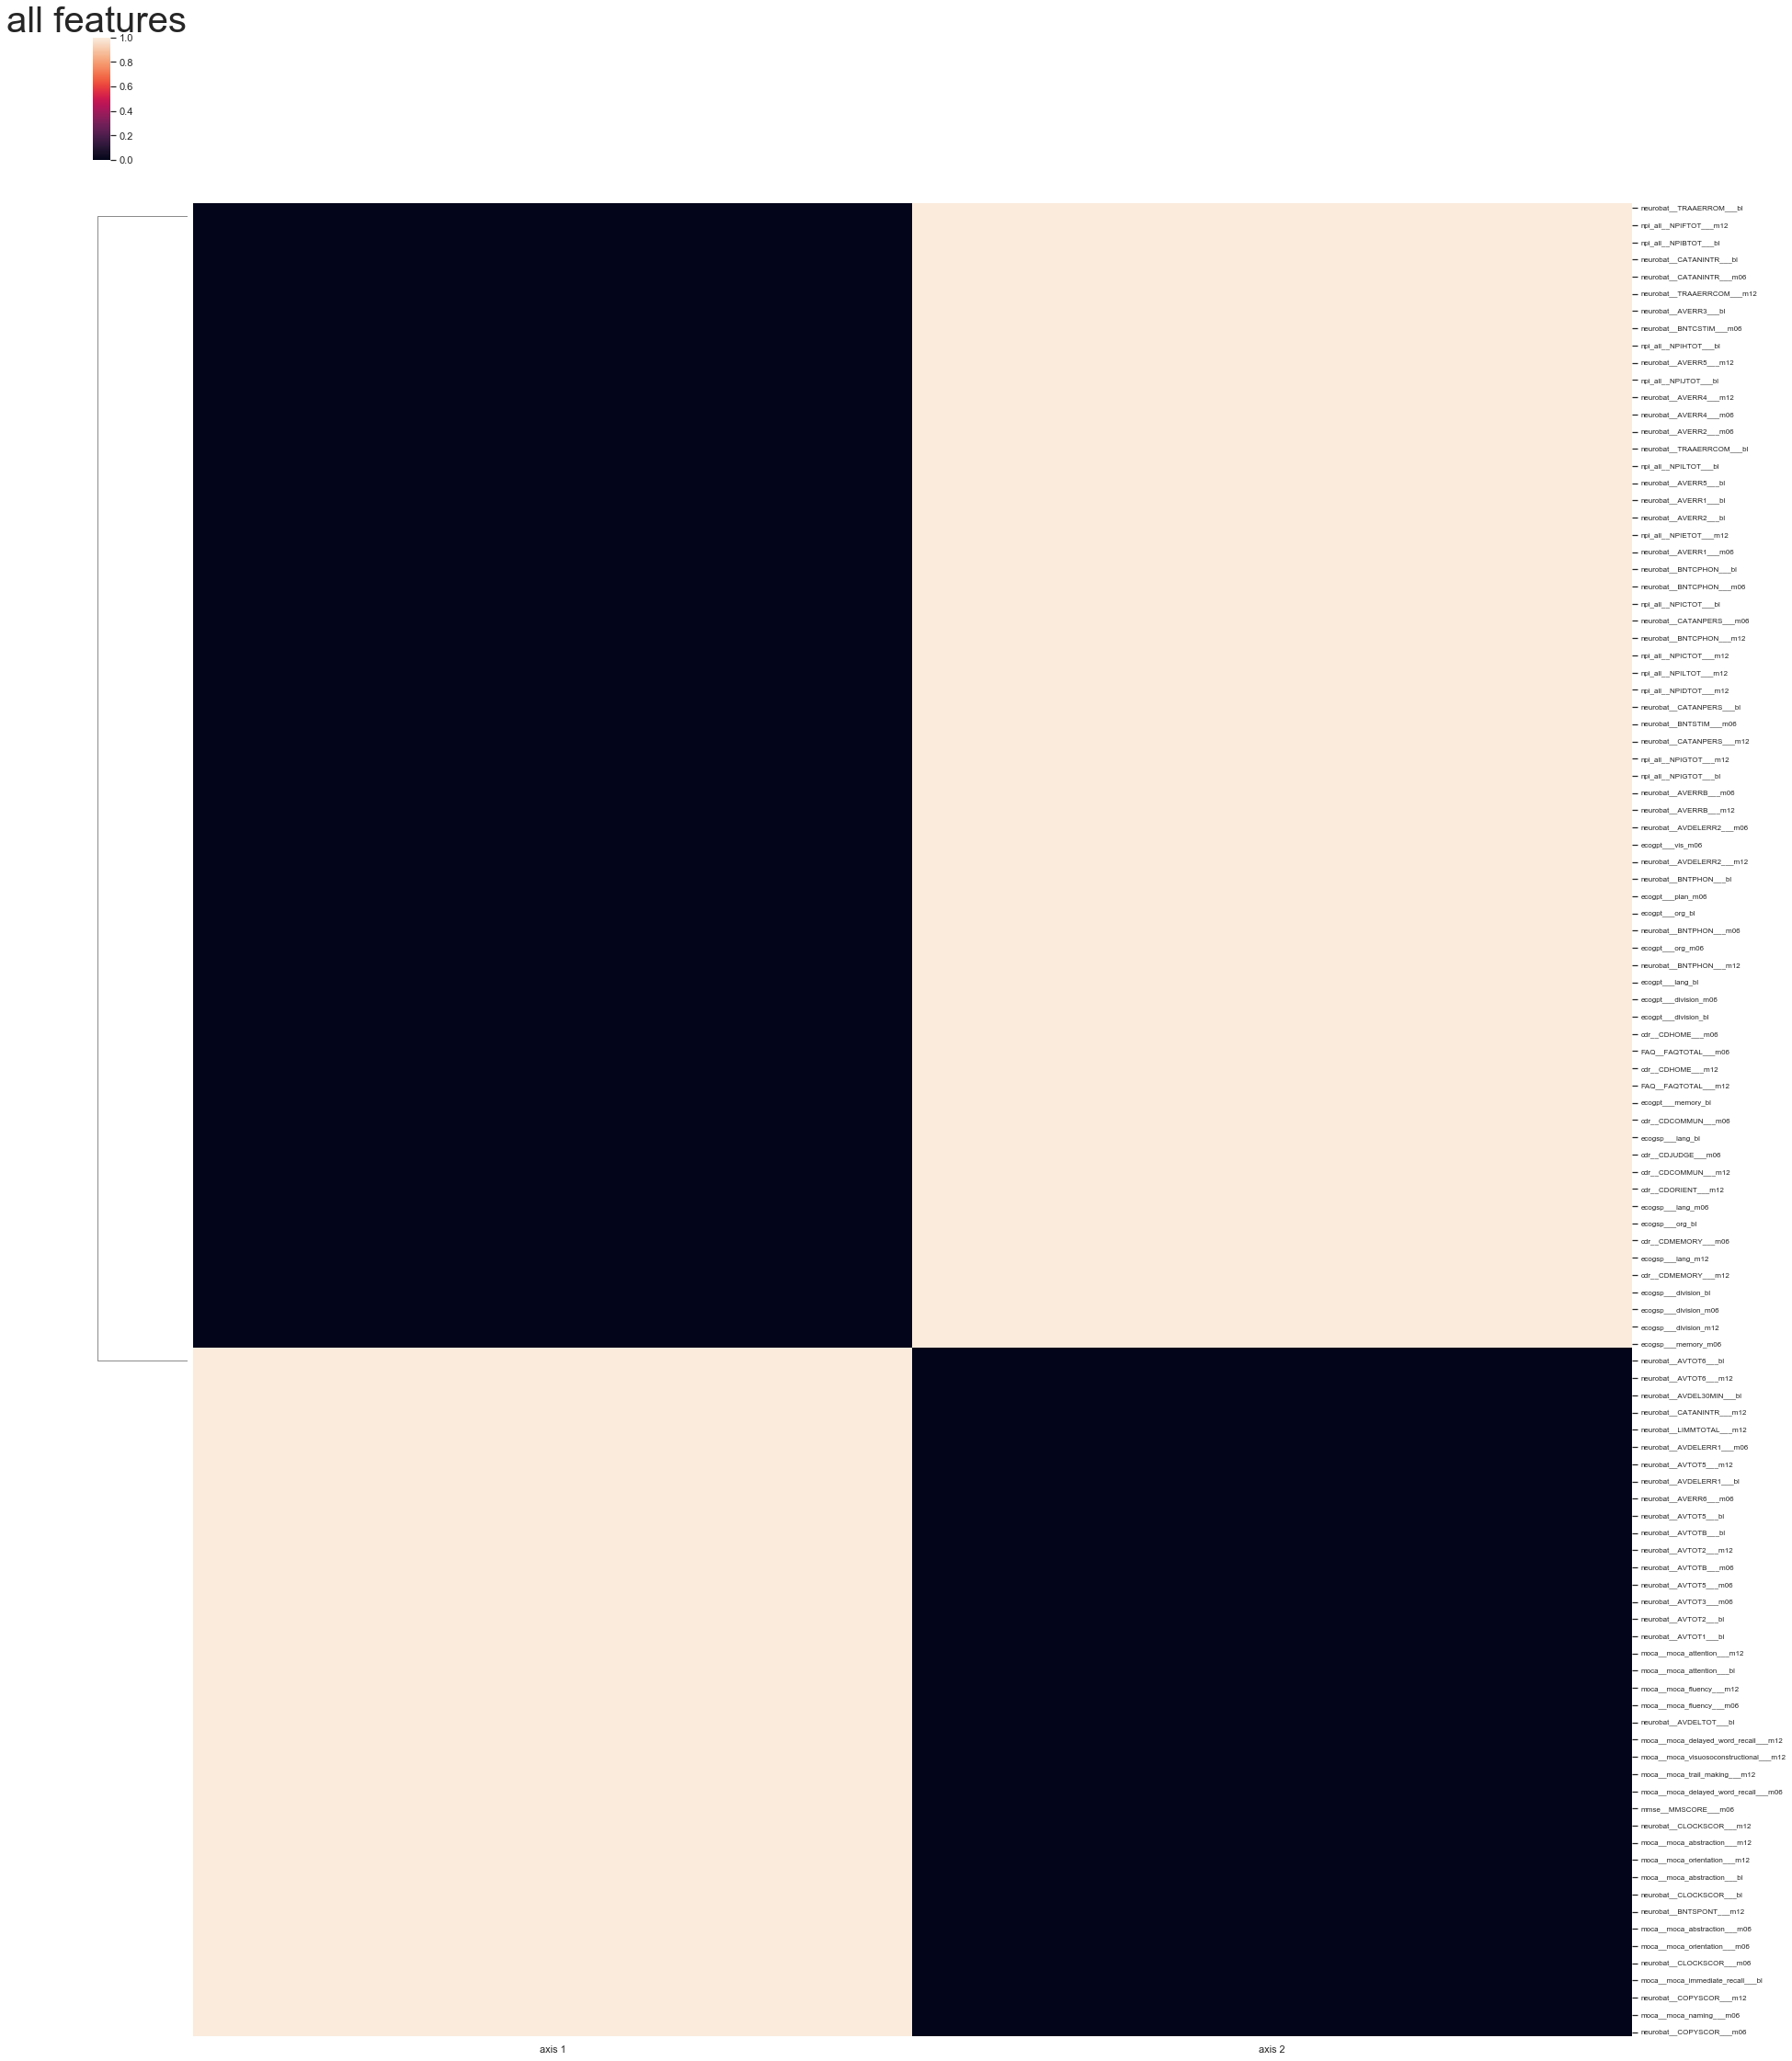

************************
Number of observations :
453
2    197
1    170
3     86
Name: DXCHANGE, dtype: int64
************************


In [19]:
list_months_to_be_considered = ['bl', 'm06','m12']
visits = 'm24'
redued_item_24, colors_categories_item_24, M_chosen_item_24,dignosis, M_H_T2, M_H_T3 = project_data(Max_intersection_dataset_item, visits, list_months_to_be_considered)
print('************************')
print('Number of observations :')
print(len(redued_item_24))
print(redued_item_24['DXCHANGE'].value_counts())
print('************************')
colors_categories_item_24_age = colors_categories_item_24.copy()

#### Functions to plot data in different format

In [20]:
def plot_side_by_side_2d(M_mci_dem_nmf_proj,Predict, redued_item_24, colors_categories_item_24, case,algorithm):
    mpl.style.use('seaborn-whitegrid')
    mpl.rc('font', size= 40)
    mpl.rc('axes', titlesize= 40)
    # in this function axis 3 is visualizing new predicted values and axis 4 is visualing old values obtained fron data
    Predict1 = Predict.copy(deep = True)
    f9 = plt.figure(figsize=(30,20))
    f9.suptitle("Alzheimer's Progression Space at 24th month\n (Using 12 month of data)", fontsize = 40)
    ax3 = f9.add_subplot(1, 2, 1)
    ax4 = f9.add_subplot(1, 2, 2)
    colors = pd.DataFrame(Predict1.replace([0,1,2,4],['yellow','blue','hotpink','cyan']))
    ax3.scatter(M_mci_dem_nmf_proj[['NMF_2_1']], M_mci_dem_nmf_proj[['NMF_2_2']], c = colors.iloc[:,0], alpha=0.5, s = 700)
    ax3.grid(True)
    ax3.set_xlabel('Cognitive decline', fontsize = 40)
    ax3.set_ylabel('Memory decline', fontsize = 40)
    ax3.set_title(" Classification by Algorithm ", fontsize = 40)
    p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc= 'yellow')
    p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
    p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='hotpink')
    ax3.legend((p1,p2,p3), ('low','medium','High'), loc='best', fontsize = 40)
    #ax3.legend((p1,p3), ('low','High'), loc='best')
    ax4.scatter(redued_item_24[['NMF_2_1']], redued_item_24[['NMF_2_2']], c = colors_categories_item_24, alpha=0.5, s = 700)
    p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
    p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
    p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
    ax4.legend((p1,p2,p3), ('Control','MCI','Dementia'), loc='best', fontsize = 40);
    ax4.grid(True)
    ax4.set_xlabel('Cognitive decline', fontsize = 40)
    ax4.set_ylabel('Memory decline', fontsize = 40)
    ax4.set_title(" Original Labels", fontsize = 40)
    plt.setp(ax4.get_xticklabels(), fontsize= 26)
    plt.setp(ax4.get_yticklabels(), fontsize= 26)
    plt.setp(ax3.get_xticklabels(), fontsize= 26)
    plt.setp(ax3.get_yticklabels(), fontsize= 26)
    plt.savefig(address +'\\paper_fig\\'+ 'nmf_side_by_side_24.png',dpi = 200)
 
def plot_nmf_gmm(M_mci_dem_nmf_proj,Predict, redued_item_24, colors_categories_item_24, case,algorithm):
    mpl.style.use('seaborn-whitegrid')
    mpl.rc('font', size= 40)
    mpl.rc('axes', titlesize= 40)
    Predict1 = Predict.copy(deep = True)
    f11 = plt.figure(figsize=(15,20))
    f11.suptitle("Alzheimer's Progression Space at 24th month", fontsize = 40)
    ax5 = f11.add_subplot(1, 1, 1)
    colors = pd.DataFrame(Predict1.replace([0,1,2,4],['yellow','blue','hotpink','cyan']))
    ax5.scatter(M_mci_dem_nmf_proj[['NMF_2_1']], M_mci_dem_nmf_proj[['NMF_2_2']], c = colors.iloc[:,0], alpha=0.5, s = 700)
    ax5.grid(True)
    ax5.set_xlabel('Cognitive decline', fontsize = 40)
    ax5.set_ylabel('Memory decline', fontsize = 40)
    ax5.set_title(" Classification by Algorithm ", fontsize = 40)
    p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc= 'yellow')
    p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
    p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='hotpink')
    ax5.legend((p1,p2,p3), ('low','medium','High'), loc='best')
    #ax3.legend((p1,p3), ('low','High'), loc='best')
    plt.setp(ax5.get_xticklabels(), fontsize= 26)
    plt.setp(ax5.get_yticklabels(), fontsize= 26)
    plt.savefig(address + 'nmf_one.png',dpi = 50)      
     
def projections_plain(M_mci_dem_nmf_proj,Predict, redued_item_24, colors_categories_item_24, case,algorithm):
    mpl.style.use('seaborn-whitegrid')
    mpl.rc('font', size= 40)
    mpl.rc('axes', titlesize= 40)
    # in this function axis 3 is visualizing new predicted values and axis 4 is visualing old values obtained fron data
    Predict1 = Predict.copy(deep = True)
    f9 = plt.figure(figsize=(15,20))
    f9.suptitle("Alzheimer's Progression Space at 24th month", fontsize = 40)
    ax4 = f9.add_subplot(1, 1, 1)
    ax4.scatter(redued_item_24[['NMF_2_1']], redued_item_24[['NMF_2_2']], c = colors_categories_item_24, alpha=0.5, s = 700)
    p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
    p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
    p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
    ax4.legend((p1,p2,p3), ('Control','MCI','Dementia'), loc='best', fontsize = 40);
    ax4.grid(True)
    ax4.set_xlabel('Cognitive decline', fontsize = 40)
    ax4.set_ylabel('Memory decline', fontsize = 40)
    ax4.set_title(" Original Labels", fontsize = 40)
    plt.setp(ax4.get_xticklabels(), fontsize= 26)
    plt.setp(ax4.get_yticklabels(), fontsize= 26)
    plt.savefig(address + 'nmf_side_by_side.png',dpi = 200)   
    
def plot_side_by_side_3d(M_mci_dem_nmf_proj,Predict, redued_item_24, colors_categories_item_24, case,algorithm):
    mpl.style.use('seaborn-whitegrid')
    mpl.rc('font', size= 18)
    mpl.rc('axes', titlesize= 18)
    
    # in this function axis 3 is visualizing new predicted values and axis 4 is visualing old values obtained fron data
    Predict1 = Predict.copy(deep = True)
    f10 = plt.figure(figsize=(20,15))
    f10.suptitle("Classification by Algorithm", fontsize = 18)
    ax3 = plt.axes(projection='3d')
    colors = pd.DataFrame(Predict1.replace([0,1,2,4],['yellow','blue','hotpink','cyan']))
    ax3.scatter(M_mci_dem_nmf_proj[['NMF_3_1']], M_mci_dem_nmf_proj[['NMF_3_2']],M_mci_dem_nmf_proj[['NMF_3_3']] ,c = colors.iloc[:,0], alpha=0.8)
    ax3.grid(True)
    ax3.set_xlabel('Cognition', fontsize = 18)
    ax3.set_ylabel('Memory and Depression ', fontsize = 18)
    ax3.set_zlabel('Memory and Depression', fontsize = 18)
    ax3.view_init(30, 30)
    p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc= 'yellow')
    p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
    p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='hotpink')
    ax3.legend((p1,p2,p3), ('low','medium','High'), loc='best')
    ax3.view_init(30, 30)
    #ax3.legend((p1,p3), ('low','High'), loc='best')
    plt.savefig(address + 'nmf_side_by_side_3d_original.png',dpi = 200)

In [21]:
M_mci_dem = redued_item_24
M_mci_dem_nmf_all = M_mci_dem[['NMF_2_1','NMF_2_2','NMF_3_1', 'NMF_3_2','NMF_3_3']].copy()
M_mci_dem_nmf = M_mci_dem[['NMF_2_1', 'NMF_2_2']]
M_mci_dem_nmf_proj_all = M_mci_dem_nmf_all[~(redued_item_24.DXCHANGE.isin([1]) )] # removing controls
M_mci_dem_nmf_proj_3d_only = M_mci_dem_nmf_proj_all[['NMF_3_1','NMF_3_2','NMF_3_3']]
M_mci_dem_nmf_proj = M_mci_dem_nmf_proj_all[['NMF_2_1','NMF_2_2']]
try:
    colors_categories_item_24_no_controls = redued_item_24[~(redued_item_24.DXCHANGE.isin([1]) )]['DXCHANGE'].replace([1,2,3], ['red', 'blue', 'green'])
except:
    pass

# Function to organize color sequence as per high low and medium
def organize_prediction_moca(M_mci_dem_nmf_proj_3d_only,Predict_gmm):
    M_mci_dem_nmf_proj = M_mci_dem_nmf_proj_3d_only
    M_mci_dem_nmf_proj['predicted'] = Predict_gmm
    a = list(pd.unique(Predict_gmm.iloc[:,0]))
    srt = np.empty((len(a),2))
    for i in a:
        a = M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,1].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        #b =  M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,1].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        #c =  M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,0].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        srt[i,1] = a
        srt[i,0] = i
    srt = pd.DataFrame(srt).sort_values([1])
    Predict_gmm.replace([srt.iloc[0,0],srt.iloc[1,0], srt.iloc[2,0] ],[0,1,2], inplace=True)   
    return pd.DataFrame(Predict_gmm)

#### Using GMM for clustering

0    125
1    111
2     47
Name: 0, dtype: int64


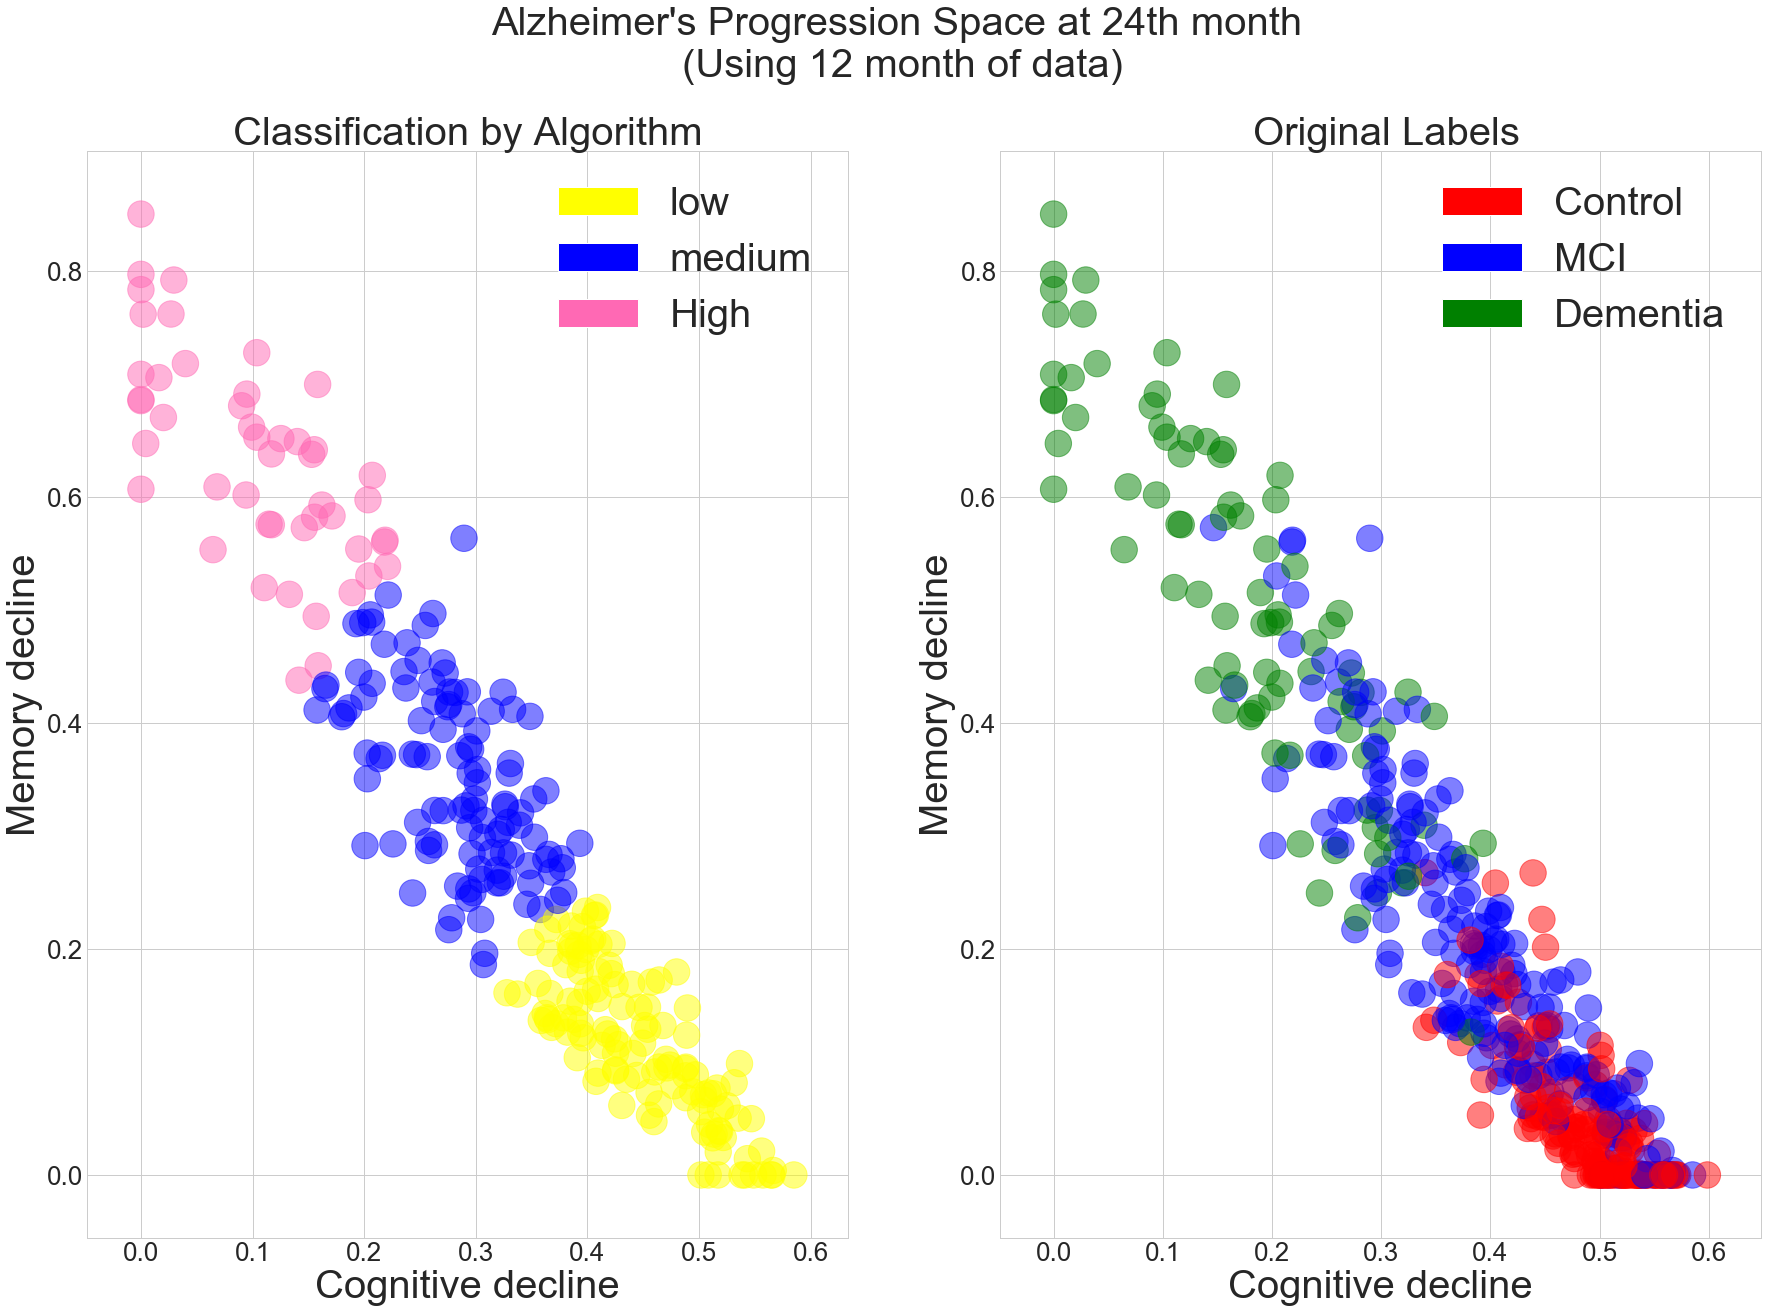

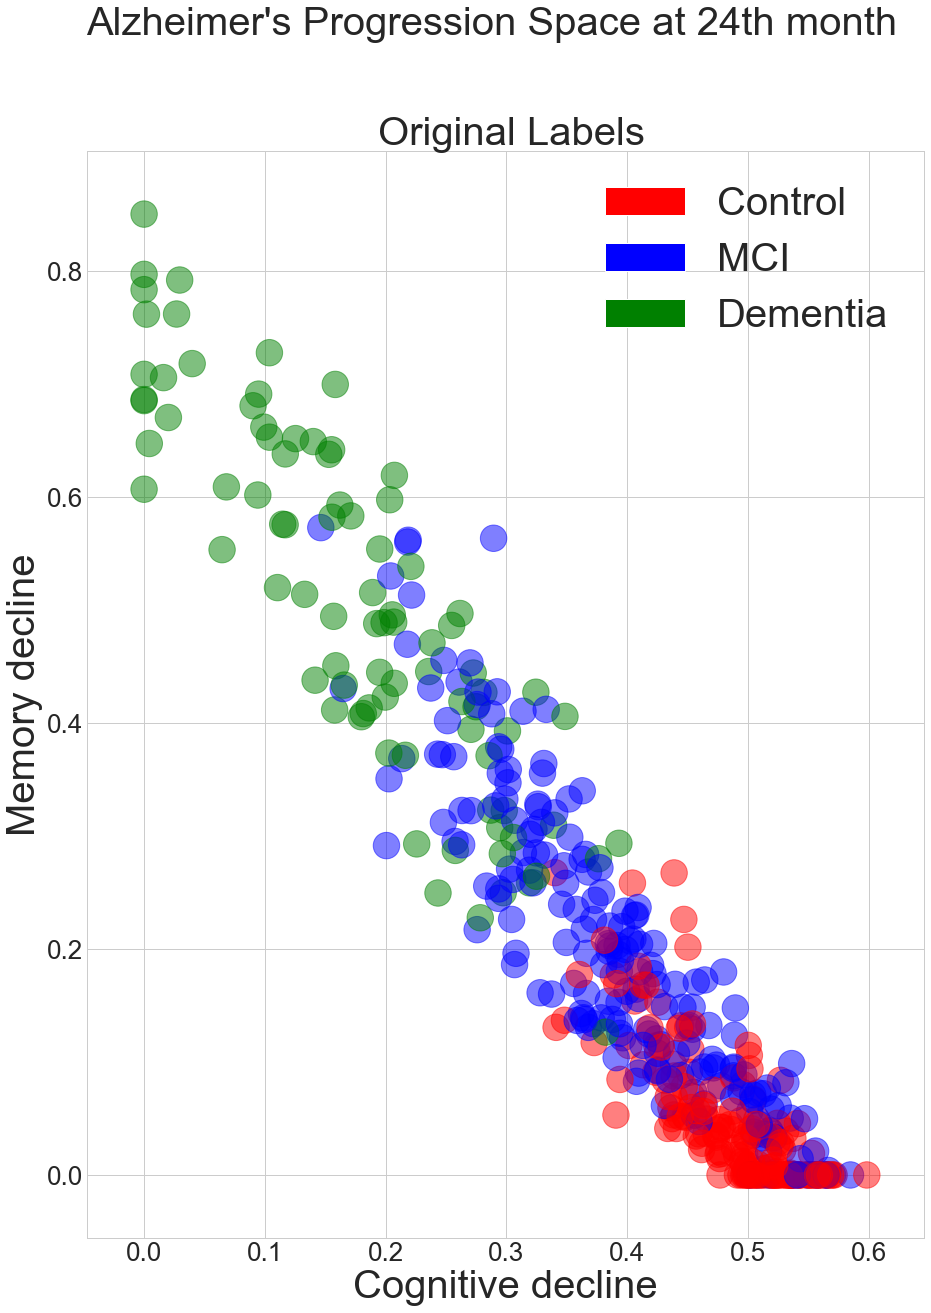

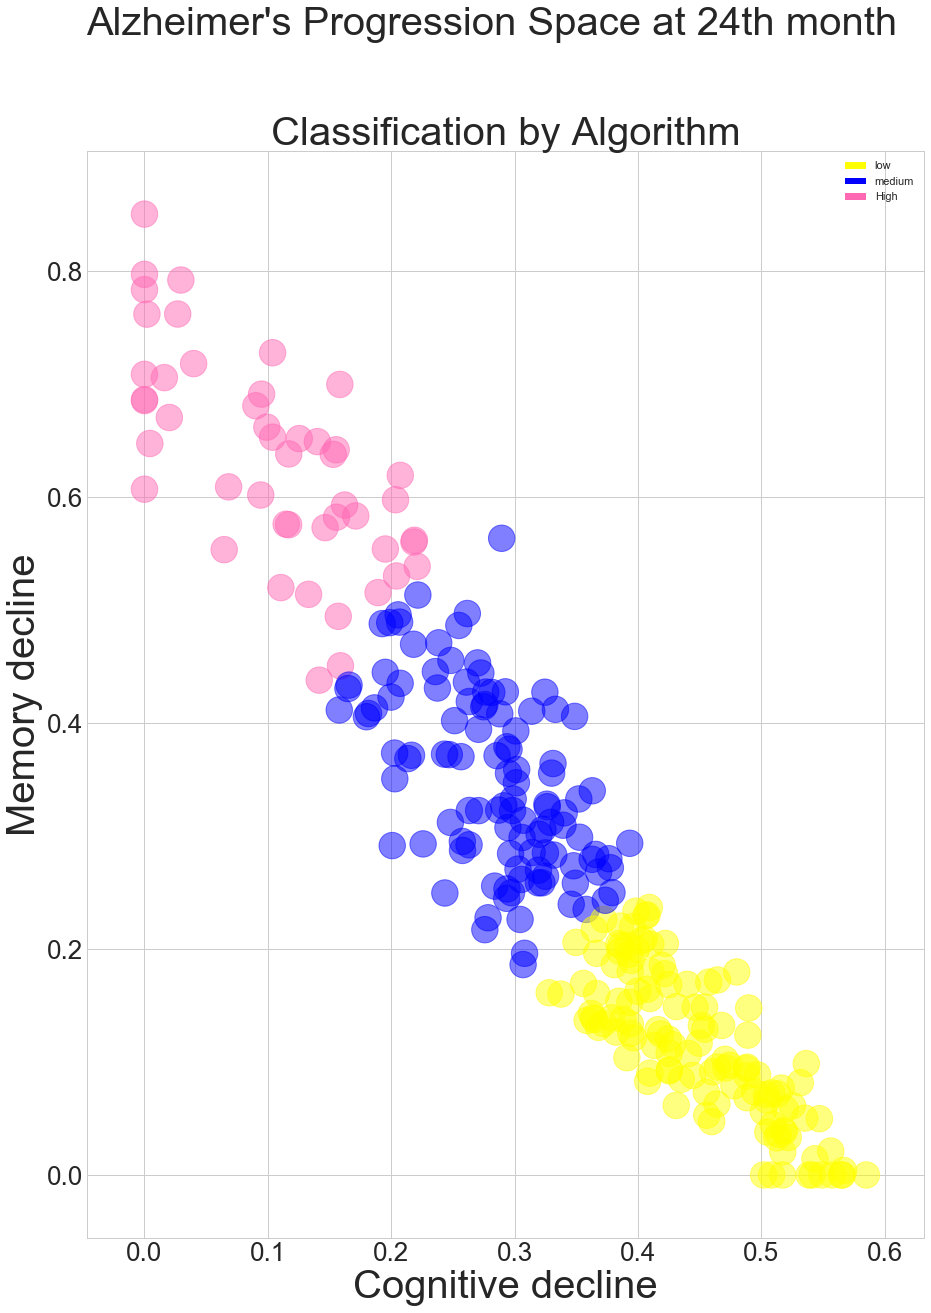

In [22]:
model_gmm = mixture.GaussianMixture(n_components=3, covariance_type='diag',  random_state = 0)
model_gmm.fit(M_mci_dem_nmf_proj) # print(gmm.means_)
# label the predicted and only keep HC and PDs
Predict_gmm = pd.DataFrame(model_gmm.predict(M_mci_dem_nmf_proj))
print(Predict_gmm.iloc[:,0].value_counts())

Predict_gmm.index = M_mci_dem_nmf_proj.index
Predict_gmm = organize_prediction_moca(M_mci_dem_nmf_proj,Predict_gmm)

plot_side_by_side_2d(M_mci_dem_nmf_proj,Predict_gmm,redued_item_24,colors_categories_item_24,'item24','gmm')       
projections_plain(M_mci_dem_nmf_proj,Predict_gmm,redued_item_24,colors_categories_item_24,'item24','gmm')       
plot_nmf_gmm(M_mci_dem_nmf_proj,Predict_gmm,redued_item_24,colors_categories_item_24,'item24','gmm')       

In [23]:
# Uncomment this if you want to visualize in 3d
# plot_side_by_side_3d(M_mci_dem_nmf_proj_3d_only,Predict_gmm,redued_item_24,colors_categories_item_24,'item24','gmm')       
# line below will convert 4 classes into 3 classes
# Predict_gmm = Predict_gmm.replace([1,2],[1,1])
nl_data = M_mci_dem_nmf[(redued_item_24.DXCHANGE.isin([1]) )]
data_prediction_labels = pd.concat([nl_data,M_mci_dem_nmf_proj]).fillna(3)
print(data_prediction_labels.iloc[:,-1].value_counts())
data_prediction = pd.merge(M_chosen_item_24,pd.DataFrame(data_prediction_labels['predicted']),left_index = True, right_index = True, how='inner')
#[0,1,2,4],['yellow','blue','hotpink','cyan']

3.0    170
0.0    125
1.0    111
2.0     47
Name: predicted, dtype: int64


### BIC to decide number of clusters

[ -927.91475926  -958.79234626 -4323.19810652 -4300.17083256
 -4290.69995352 -4269.15506319 -4301.5057237 ]


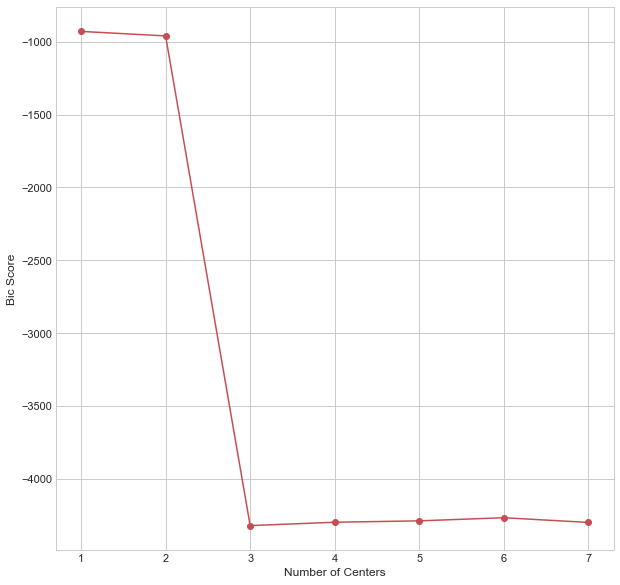

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
Nclusters = np.arange(1, 8)
# find best number of clusters via BIC
clfs = [mixture.GaussianMixture(n_components=N, covariance_type='tied').fit(M_mci_dem_nmf_proj) for N in Nclusters]
BICs = np.array([clf.bic(M_mci_dem_nmf_proj) for clf in clfs])
clf = clfs[np.argmin(BICs)]
print(BICs)
# scatter the points
ax.plot(Nclusters, BICs, 'ro-')
plt.savefig(address + 'bic_48.png',dpi = 200)  
plt.xlabel('Number of Centers')
plt.ylabel('Bic Score')
plt.show()

#### Visualizing GMM cluster

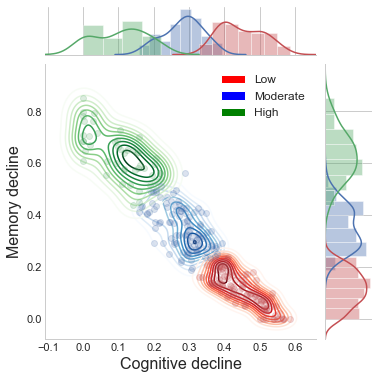

In [25]:
colors_categories_item_24 = pd.DataFrame(colors_categories_item_24)


x_red = M_mci_dem_nmf_proj.loc[Predict_gmm.iloc[:,0].isin([0]),'NMF_2_1']
y_red = M_mci_dem_nmf_proj.loc[Predict_gmm.iloc[:,0].isin([0]),'NMF_2_2']

x_blue = M_mci_dem_nmf_proj.loc[Predict_gmm.iloc[:,0].isin([1]),'NMF_2_1']
y_blue = M_mci_dem_nmf_proj.loc[Predict_gmm.iloc[:,0].isin([1]),'NMF_2_2']

x_green = M_mci_dem_nmf_proj.loc[Predict_gmm.iloc[:,0].isin([2]),'NMF_2_1']
y_green = M_mci_dem_nmf_proj.loc[Predict_gmm.iloc[:,0].isin([2]),'NMF_2_2']
plt.ion()
plt.show()
plt.pause(0.001)
a = 0.2
l = 10
zo = 0

p = sns.JointGrid(x = list( x_blue), y = list( y_blue) , size=6)
p = p.plot_joint(plt.scatter, c="b", alpha = a)
# p.ax_marg_x.hist(-x_hc, alpha = 0.5, color='r')
# p.ax_marg_y.hist(y_hc, orientation = 'horizontal', alpha = 0.5, color='r')
p.plot_marginals(sns.distplot, color='b', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Blues")

p.x = list( x_red)
p.y = list( y_red)
p.plot_joint(plt.scatter, c="r", alpha = a)
p.plot_marginals(sns.distplot, color='r', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Reds")

p.x = list( x_green)
p.y = list( y_green)
p.plot_joint(plt.scatter, c="g", alpha = a)
p.plot_marginals(sns.distplot, color='g', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Greens")
plt.grid()

p.set_axis_labels(xlabel='Cognitive decline', ylabel='Memory decline')
# p.ax_joint.set_xticklabels([])
# p.ax_joint.set_yticklabels([])
# p.ax_marg_x.legend_.remove()

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
plt.legend((p1, p2, p3), ('Low', 'Moderate', 'High'), loc='best',prop={'size':12});
plt.xlabel('Cognitive decline', fontsize = 16)
plt.ylabel('Memory decline', fontsize = 16)
p.savefig(address +'\\paper_fig\\'+'gmm_original_joint_plot_24.png',dpi = 200)


#### Trainng different classifiers

Nearest Neighbors
[0.61956522 0.68131868 0.78888889 0.72222222 0.57777778]
#####################
Linear SVM
[0.77173913 0.71428571 0.74444444 0.85555556 0.7       ]
#####################
RBF SVM
[0.36956522 0.37362637 0.37777778 0.37777778 0.37777778]
#####################
Decision Tree
[0.75       0.69230769 0.75555556 0.75555556 0.66666667]
#####################
AdaBoost
[0.70652174 0.7032967  0.74444444 0.84444444 0.66666667]
#####################
Naive Bayes
[0.72826087 0.57142857 0.8        0.71111111 0.64444444]
#####################
Linear Discriminant Analysis
[0.70652174 0.6043956  0.74444444 0.75555556 0.57777778]
#####################
Quadratic Discriminant Analysis
[0.66304348 0.72527473 0.71111111 0.7        0.62222222]
#####################
Logistic Regression
[0.29347826 0.27472527 0.23333333 0.28888889 0.35555556]
#####################
Random Forest
[0.81521739 0.79120879 0.86666667 0.87777778 0.72222222]
#####################


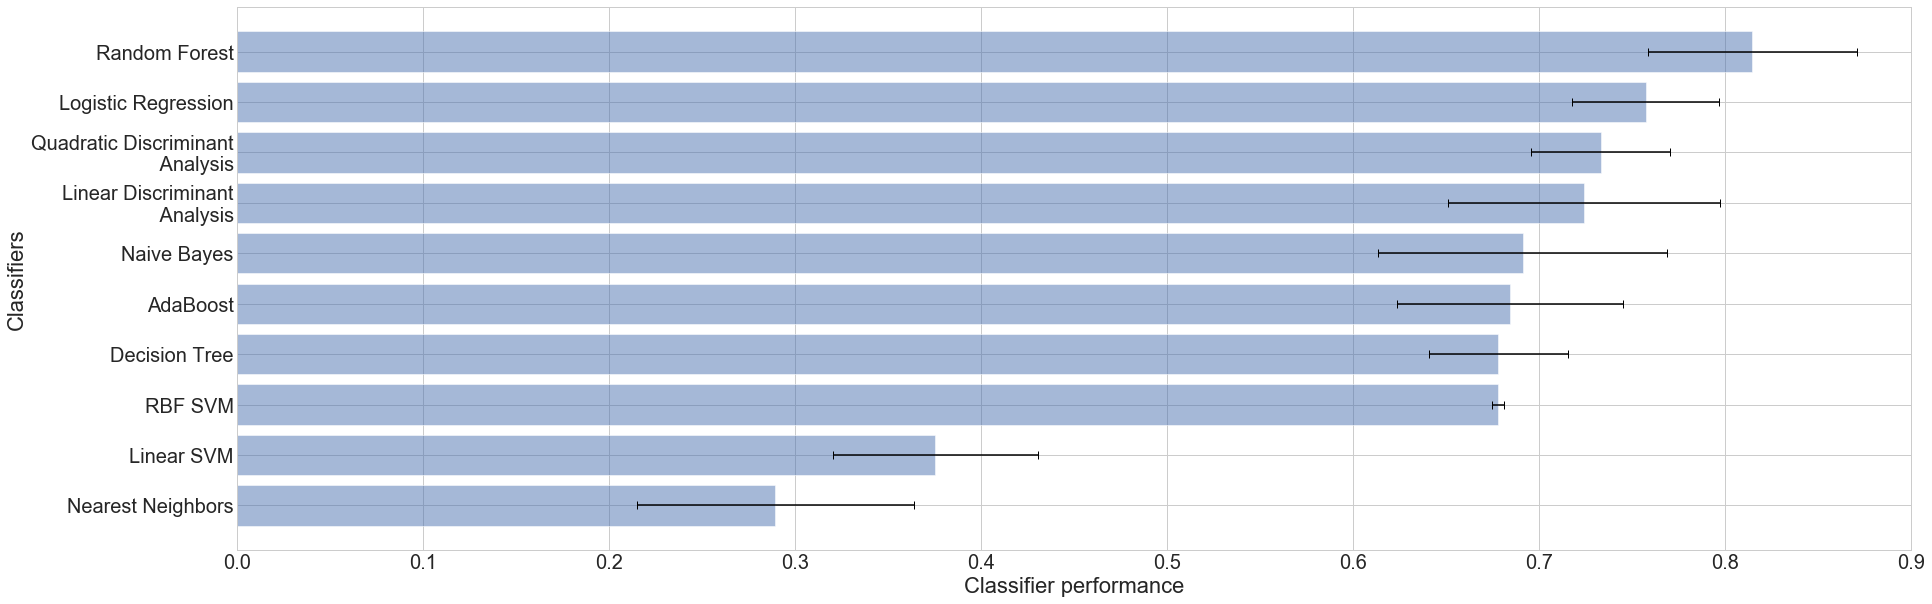

In [26]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis", "Logistic Regression"
         , "Random Forest"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    LogisticRegression(),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    RandomForestClassifier(n_estimators = 40)]

# considering low mci and control same 
data_prediction1 = data_prediction.copy(deep = True)
data_prediction1['predicted'] = data_prediction1['predicted'].replace([3],[3])
del data_prediction1['predicted'] 

Predict_gmm = Predict_gmm.rename(columns={0: "predicted"})
data_prediction1 = pd.merge(data_prediction1,Predict_gmm,left_index = True, right_index = True, how='outer')
data_prediction1 = data_prediction1.fillna(3)

X_train, X_test, y_train, y_test = train_test_split(data_prediction1.iloc[:,0:-1], data_prediction1['predicted'], test_size=0.2, random_state=42)

x_full = data_prediction1.iloc[:,0:-1]
y_full = data_prediction1['predicted']

scores1 = []
score_entry = {}
y_pred = {}
 
list_of_names = []
mean_scores = []
standard_devi = []

for name, clf in zip(names, classifiers):
    pipeline = Pipeline([(name, clf)])
    scores = cross_val_score(pipeline, x_full, y_full, scoring='accuracy', cv=5)
    list_of_names.append(name)
    mean_scores.append( scores.mean() )
    standard_devi.append( scores.std() )
    print(name)
    print(scores)
    print('#####################')

mean_scores, names = zip(*sorted(zip(mean_scores, names)))
fig, ax = plt.subplots( figsize=(30, 10) )
ax.barh(  np.arange(len(names)),mean_scores, xerr=standard_devi, align='center', alpha=0.5, ecolor='black', capsize=4)
ax.set_xlabel('Classifier performance', fontsize = 22)
ax.set_ylabel('Classifiers', fontsize = 22)
plt.xlim( ([0.0,0.90]) )
ax.set_yticks(np.arange(len(names)))

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "AdaBoost", "Naive Bayes", "Linear Discriminant\n Analysis",
         "Quadratic Discriminant\n Analysis", "Logistic Regression"
         , "Random Forest"]
ax.set_yticklabels(names,rotation=0 , fontsize = 20 )
ax.set_xticklabels( [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], fontsize = 20 )
ax.xaxis.grid(True)
# plt.title('Comparision of different classifiers for prediction at m48 considering baseline and m12', fontsize = 28)
fig.savefig(address +'\\paper_fig\\'+ 'accuracy24.png',dpi = 200)
fig.show()

#### Fine tuning Random Forest

In [27]:
pipeline = Pipeline([('classifier', RandomForestClassifier())])
scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=5)
mean = scores.mean()
std = scores.std()
print('Mean of the five fold cross validation accuracy = ', mean)
print('Standard Deviation of the five fold cross validation accuracy = ',std)
print(pipeline.get_params())

'''
you can also specify classifications models here
'''
# grid = {
#     'classifier__n_estimators': [5,10,15,20,25,30,35,40,45,50],\
#     'classifier__max_depth' : [5,10,15,20,25,30,35,40,45,50],\
#     'classifier__class_weight': [None, 'balanced'],\
#     'classifier__max_features': ['auto','sqrt','log2', None],\
#     'classifier__random_state' : [0],  
#     'classifier__min_samples_leaf':[1,2,3,0.1,0.05,0.01]
# }

grid = {
    'classifier__n_estimators': [40,45,50],\
    'classifier__max_depth' : [15,20,25],\
    'classifier__class_weight': [None, 'balanced'],\
    'classifier__max_features': ['auto','sqrt','log2', None],\
    'classifier__random_state' : [0],  
    'classifier__min_samples_leaf':[2,3,4]
}

# grid = {
#     'classifier__n_estimators': [30],\
#     'classifier__max_depth' : [15],\
#     'classifier__class_weight': [None],\
#     'classifier__max_features': ['auto'],\
#     'classifier__random_state' : [0],  
#     'classifier__min_samples_leaf':[1]
# }

grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=1, cv=5)
grid_search.fit(X=x_full, y=y_full)

print("-----------")
print("-----------")
print('best score\n')
print(grid_search.best_score_)
print('best_params\n')
print(grid_search.best_params_)
print(grid_search.best_index_)
print('Mean cv accuracy on test set\n')
print(grid_search.cv_results_['mean_test_score'][grid_search.best_index_])
print('Standard deviation on test set\n')
print(grid_search.cv_results_['std_test_score'][grid_search.best_index_])
print('Mean cv accuracy on train set\n')
print(grid_search.cv_results_['mean_train_score'][grid_search.best_index_])
print('Standard deviation on train set\n')
print(grid_search.cv_results_['std_train_score'][grid_search.best_index_])
print(grid_search.best_score_)


Mean of the five fold cross validation accuracy =  0.7925525525525525
Standard Deviation of the five fold cross validation accuracy =  0.06216873360399434
{'memory': None, 'steps': [('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))], 'classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_sco

KeyboardInterrupt: 

#### Making AUC curve

In [28]:
# considering low mci and control same 
data_prediction1 = data_prediction.copy(deep = True)
data_prediction1['predicted'] = data_prediction1['predicted'].replace([3],[3])
del data_prediction1['predicted'] 

Predict_gmm = Predict_gmm.rename(columns={0: "predicted"})
data_prediction1 = pd.merge(data_prediction1,Predict_gmm,left_index = True, right_index = True, how='outer')
data_prediction1 = data_prediction1.fillna(3)

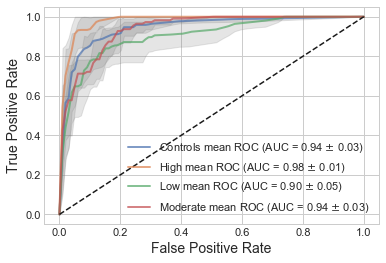

In [29]:
X,Y = data_prediction1.iloc[:,0:-1],data_prediction1['predicted']
n_classes = y_train.unique()
cv = StratifiedKFold(n_splits=5)
for k in n_classes:
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for train, test in cv.split(X,Y):
            pipeline = Pipeline([('classifier', RandomForestClassifier(max_features= None, n_estimators=35, max_depth= 10,class_weight= 'balanced', random_state= 0))])
            pipeline.fit(X.iloc[train], Y.iloc[train]==k)
            preds  = pipeline.predict_proba(X.iloc[test])
            label =  Y.iloc[test] == k
            fpr, tpr, _ = metrics.roc_curve(label, preds[:,1])
            tprs.append(interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = metrics.auc(fpr, tpr)
            aucs.append(roc_auc)
            i += 1
            
    class_name = 'Controls' if k==3 else 'Low' if k==0 else 'Moderate' if k==1 else 'High'
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr,label= r'{0} mean ROC (AUC = {1:0.2f} $\pm$ {2:0.2f})'.format(class_name, mean_auc, std_auc) ,lw=2, alpha=.7)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2)

plt.figure(1, figsize=(18, 18))
plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([-0.025, 1.025])
# plt.ylim([-0.025, 1.025])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
#plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(address +'\\paper_fig\\'+ 'auc_24.png',dpi = 200)
plt.show()

## Ploting Reversion 

In [30]:
def project_data_CN_MCI_DMN_edgecolors(Max_intersection_dataset, visit, list_months_to_be_considered):
    patno_filtered_visited = dict_datasets[Max_intersection_dataset[0]]
    for t in range(len(Max_intersection_dataset)):
        patients = dict_datasets[Max_intersection_dataset[t]]
        patno_filtered_visited = pd.merge(patno_filtered_visited, patients, left_index = True, right_index = True, how='inner')
    M_chosen = normalize(patno_filtered_visited,'m')
    M_chosen = M_chosen.T[ M_chosen.T.isnull().sum(axis = 1)== 0 ].T
    M_W_columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_2_1', 'PCA_2_2','ICA_1', 'ICA_2', 'NMF_2_1', 'NMF_2_2', 
               'NMF_3_1', 'NMF_3_2', 'NMF_3_3','ICA_3_1', 'ICA_3_2', 'ICA_3_3']
    M_W = pd.DataFrame(index=M_chosen.index, columns=M_W_columns)
    # PCA
    model_pca = sklearnPCA(n_components=3)
    M_W[['PCA_1', 'PCA_2', 'PCA_3']] = model_pca.fit_transform(M_chosen)
    model_pca = sklearnPCA(n_components=2)
    M_W[['PCA_2_1', 'PCA_2_2']] = model_pca.fit_transform(M_chosen)
    # ICA
    model_ICA = decomposition.FastICA(n_components=2)
    M_W[['ICA_1', 'ICA_2']] = model_ICA.fit_transform(M_chosen)
    model_ICA = decomposition.FastICA(n_components=3)
    M_W[['ICA_3_1', 'ICA_3_2', 'ICA_3_3']] = model_ICA.fit_transform(M_chosen)
    # NMF
    model_NMF = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
    model_NMF3 = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
    M_W[['NMF_2_1', 'NMF_2_2']] = model_NMF.fit_transform(M_chosen)
    M_W[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen)
    redued_data = pd.DataFrame(M_W) # this datset contains all the ICA, PCA and NMF vectors
    # plot the dimension reduction color makrked with participants' "categories", and "gender"
    dignosis = pd.read_csv("ADNI\\Raw_Data\\Assessment\\dxsum.csv",  usecols= ['RID','DXCHANGE','DXMDUE','DXCONFID','VISCODE'])
    dignosis = dignosis[ ~(dignosis['DXCHANGE'].isnull())]
    dignosis = dignosis[ ~(dignosis['DXMDUE'] == 'MCI due to other etiology')]
    dignosis = dignosis[ ~(dignosis['DXCONFID'] == 'Mildly Confident')]
    dignosis = dignosis[ ~(dignosis['DXCONFID'] == 'Uncertain')]
    dignosis = dignosis[dignosis['RID'].isin(redued_data.index)]
    dignosis = dignosis.set_index('RID')
    dignosis = dignosis[dignosis['VISCODE'] == visit]
    redued = redued_data.merge(dignosis, how = 'inner', left_index = True, right_index = True)
    redued = redued[ ~(redued['DXCHANGE'].isnull())]
    redued.DXCHANGE = redued.DXCHANGE.replace(['Stable: NL to NL', 'Stable: NL','Stable: MCI','Stable: MCI to MCI',\
                                               'Stable: Dementia', 'Stable: Dementia to Dementia',\
                                               'Conversion: NL to MCI','Conversion: MCI to Dementia','Conversion: NL to Dementia',\
                                               'Reversion: MCI to NL', 'Reversion: Dementia to MCI'],[1,1,2,2,3,3,4,5,6,7,8])
    # Replacing the codes as described earlier
    redued.DXCHANGE = redued.DXCHANGE.replace([1,2,3,4,5,6,7,8],[1,2,3,2,3,3,1,2]) 
    colors_categories = redued.DXCHANGE.replace([1,2,3], ['red', 'blue', 'green'])
    # use this or above 2 lines
    #colors_categories = redued.DXCHANGE.replace([1,2,3,4,5,6,7,8,9], ['red', 'blue', 'green', 'yellow','purple','pink','black','cyan','magenta'])
    list_of_colors = ['red', 'blue', 'green']
    return redued, colors_categories, M_chosen,dignosis, list_of_colors

In [31]:
def projections_two(redued,colors_categories, colors_categories_item_CN_MCI_DMN,list_of_colors, list_prog,list_replace):
    redued.merge(colors_categories.to_frame(), left_index=True, right_index=True)   
    redued_1 = redued[ redued.DXCHANGE_2.isin([7,8])]
    colors_categories = redued_1['DXCHANGE']
    fig = plt.figure(4, figsize=(15,15))
    ax1 = fig.add_subplot(111)
    ax1.scatter(redued_1[['NMF_2_1']], redued_1[['NMF_2_2']], c = redued_1['DXCHANGE'], s=700, marker='v')
    #plt.title('Reversion: MCI to NL and Reversion: Dementia to MCI')
    ax1.scatter(redued[['NMF_2_1']], redued[['NMF_2_2']], edgecolors = colors_categories_item_CN_MCI_DMN, s= 700,facecolors='none', alpha = 0.5)#,linewidth= 1.5)
    p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc= 'red')
    p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc= 'blue')
    p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc= 'green')
    p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc= '#999999')
    p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc= '#e41a1c')
    plt.legend((p1, p2, p3, p4,p5), ('Control', 'MCI','Dementia', 'MCI to Control','Dementia to MCI' ), loc='best', fontsize = 22);
    plt.xlim((-.02, 0.75))
    plt.ylim((-.02, 0.9)) 
    plt.xlabel('Cognitive decline', fontsize = 28)
    plt.ylabel('Memory decline', fontsize = 28)
    plt.tick_params(labelsize=22)
    plt.grid(True)
    plt.savefig(address +'\\paper_fig\\'+ 'reversion_24.png',dpi = 200)
    plt.show()

In [32]:
def project_list_of_colors(Max_intersection_dataset, visit, list_months_to_be_considered):
    patno_filtered_visited = dict_datasets[Max_intersection_dataset[0]]
    for t in range(len(Max_intersection_dataset)):
        patients = dict_datasets[Max_intersection_dataset[t]]
        patno_filtered_visited = pd.merge(patno_filtered_visited, patients, left_index = True, right_index = True, how='inner')
    M_chosen = normalize(patno_filtered_visited,'m')
    M_chosen = M_chosen.T[ M_chosen.T.isnull().sum(axis = 1)== 0 ].T
    M_W_columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_2_1', 'PCA_2_2','ICA_1', 'ICA_2', 'NMF_2_1', 'NMF_2_2', 
               'NMF_3_1', 'NMF_3_2', 'NMF_3_3','ICA_3_1', 'ICA_3_2', 'ICA_3_3']
    M_W = pd.DataFrame(index=M_chosen.index, columns=M_W_columns)
    # PCA
    model_pca = sklearnPCA(n_components=3)
    M_W[['PCA_1', 'PCA_2', 'PCA_3']] = model_pca.fit_transform(M_chosen)
    model_pca = sklearnPCA(n_components=2)
    M_W[['PCA_2_1', 'PCA_2_2']] = model_pca.fit_transform(M_chosen)
    # ICA
    model_ICA = decomposition.FastICA(n_components=2)
    M_W[['ICA_1', 'ICA_2']] = model_ICA.fit_transform(M_chosen)
    model_ICA = decomposition.FastICA(n_components=3)
    M_W[['ICA_3_1', 'ICA_3_2', 'ICA_3_3']] = model_ICA.fit_transform(M_chosen)
    # NMF
    model_NMF = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
    model_NMF3 = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
    M_W[['NMF_2_1', 'NMF_2_2']] = model_NMF.fit_transform(M_chosen)
    M_W[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen)
    H = model_NMF.components_
    H_columns = M_chosen.columns
    M_H = pd.DataFrame(columns=H_columns)
    M_H.loc[0] = H[0,:]
    M_H.loc[1] = H[1,:]
    M_H_T = M_H.T.sort_values(by=[1],ascending=False)
    M_H_T.columns = ['axis 1','axis 2']
    M_H_T = pd.DataFrame(M_H_T)
    M_H_T = M_H_T.div(M_H_T.sum(axis=1), axis=0)
    M_H_T['new'] = 0
    M_H_T['new'] = M_H_T.apply(lambda M_H_T :  'axis 1' if (M_H_T['axis 1']> M_H_T['axis 2']+(M_H_T['axis 2'] *0.05) ) \
                               else 'axis 2' if (M_H_T['axis 2'] > M_H_T['axis 1'] +(M_H_T['axis 1']*0.05) ) else 'ambigious', axis=1)
    M_H_T.to_csv(address + "all_2d_list.csv") 
    H = model_NMF3.components_
    H_columns = M_chosen.columns
    M_H = pd.DataFrame(columns=H_columns)
    M_H.loc[0] = H[0,:]
    M_H.loc[1] = H[1,:]
    M_H.loc[2] = H[2,:]
    M_H_T = M_H.T.sort_values(by=[2],ascending=False)
    M_H_T.columns = ['axis 1','axis 2', 'axis 3']
    M_H_T = pd.DataFrame(M_H_T)
    M_H_T = M_H_T.div(M_H_T.sum(axis=1), axis=0)
    M_H_T['new'] = 0
    M_H_T['new'] = M_H_T.apply(lambda M_H_T :  'axis 1' if (M_H_T['axis 1']> M_H_T['axis 2']+M_H_T['axis 3'] ) \
                               else 'axis 2' if (M_H_T['axis 2'] > M_H_T['axis 1'] +M_H_T['axis 3']) else 'axis 3' \
                               if (M_H_T['axis 3'] > M_H_T['axis 1'] +M_H_T['axis 2']) else 'ambigious'  , axis=1)
    M_H_T.to_csv(address + "all_3d_list.csv") 
    
    redued_data = pd.DataFrame(M_W) # this datset contains all the ICA, PCA and NMF vectors
    # plot the dimension reduction color makrked with participants' "categories", and "gender"
    dignosis = pd.read_csv("ADNI\\Raw_Data\\Assessment\\dxsum.csv",  usecols= ['RID','DXCHANGE','DXMDUE','DXCONFID','VISCODE'])
    dignosis = dignosis[ ~(dignosis['DXCHANGE'].isnull())]
    dignosis = dignosis[ ~(dignosis['DXMDUE'] == 'MCI due to other etiology')]
    dignosis = dignosis[ ~(dignosis['DXCONFID'] == 'Mildly Confident')]
    dignosis = dignosis[ ~(dignosis['DXCONFID'] == 'Uncertain')]
    dignosis = dignosis[dignosis['RID'].isin(redued_data.index)]
    dignosis = dignosis.set_index('RID')
    dignosis = dignosis[dignosis['VISCODE'] == visit]
    redued = redued_data.merge(dignosis, how = 'inner', left_index = True, right_index = True)
    redued = redued[ ~(redued['DXCHANGE'].isnull())]
    redued['DXCHANGE_2'] = redued.DXCHANGE
    redued['DXCHANGE_original'] = redued.DXCHANGE
    redued.DXCHANGE = redued.DXCHANGE.replace(['Stable: NL to NL', 'Stable: NL','Stable: MCI','Stable: MCI to MCI','Stable: Dementia', \
                                               'Stable: Dementia to Dementia','Conversion: NL to MCI','Conversion: MCI to Dementia',\
                                               'Conversion: NL to Dementia','Reversion: MCI to NL', 'Reversion: Dementia to MCI'],[1,1,2,2,3,3,4,5,6,7,8])
    redued.DXCHANGE_2 = redued.DXCHANGE_2.replace(['Stable: NL to NL', 'Stable: NL','Stable: MCI','Stable: MCI to MCI','Stable: Dementia',\
                                                   'Stable: Dementia to Dementia','Conversion: NL to MCI','Conversion: MCI to Dementia',\
                                                   'Conversion: NL to Dementia','Reversion: MCI to NL', 'Reversion: Dementia to MCI'],[1,1,2,2,3,3,4,5,6,7,8])
    # Replacing the codes as described earlier
    # use this or above 2 lines
    redued.DXCHANGE  = redued.DXCHANGE.replace( [1,1,2,2,3,3,4,5,6,7,8] , ['#377eb8', '#377eb8', '#ff7f00', '#ff7f00', '#4daf4a', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999','#e41a1c' ] )
    colors_categories = redued.DXCHANGE
    list_of_colors = ['#377eb8', '#377eb8', '#ff7f00', '#ff7f00', '#4daf4a', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999','#e41a1c' ]                                            
    list_prog = ['Stable: NL to NL', 'Stable: NL','Stable: MCI','Stable: MCI to MCI','Stable: Dementia', 'Stable: Dementia to Dementia','Conversion: NL to MCI','Conversion: MCI to Dementia','Conversion: NL to Dementia','Reversion: MCI to NL','Reversion: Dementia to MCI']
    list_replace = [1,1,2,2,3,3,4,5,6,7,8]
    return redued, colors_categories, M_chosen,dignosis, list_of_colors,list_prog,list_replace

In [33]:
list_months_to_be_considered = ['bl', 'm06','m12']
visits = 'm24'
redued_item_CN_MCI_DMN, colors_categories_item_CN_MCI_DMN, M_chosen_item_CN_MCI_DMN,dignosis_CN_MCI_DMN,list_of_colors_CN_MCI_DMN = project_data_CN_MCI_DMN_edgecolors(Max_intersection_dataset_item, visits, list_months_to_be_considered)

In [34]:
list_months_to_be_considered = ['bl', 'm06','m12']
visits = 'm24'
redued_item_24, colors_categories_item_24, M_chosen_item_24,dignosis,list_of_colors ,list_prog, list_replace= project_list_of_colors(Max_intersection_dataset_item, visits, list_months_to_be_considered)
print('************************')
print('Number of observations :')
print(len(redued_item_24))
# print(redued_item_24['DXCHANGE'].unique())
print('************************')

************************
Number of observations :
453
************************


In [35]:
def projections_reversions(redued,colors_categories, colors_categories_item_CN_MCI_DMN,list_of_colors, list_prog,list_replace,show):
    redued.merge(colors_categories.to_frame(), left_index=True, right_index=True)
    if show == 'MCI to DEMENTIA':
        a = 7
    elif show== 'NL to Dementia':
        a = 8
    elif show== 'MCI to NL':
        a = 9
    elif show== 'Dementia to MCI':
        a = 10
    elif show== 'NL to MCI':
        a = 6       
    redued_1 = redued[ redued.DXCHANGE_2.isin([list_replace[a]])]
    colors_categories = redued_1['DXCHANGE'] 
    fig = plt.figure(4, figsize=(18,18))
    ax1 = fig.add_subplot(111)
    ax1.scatter(redued_1[['NMF_2_1']], redued_1[['NMF_2_2']], c = redued_1['DXCHANGE'], s=700, marker='v')
    plt.title(show, fontsize = 40)
    ax1.scatter(redued[['NMF_2_1']], redued[['NMF_2_2']], edgecolors = colors_categories_item_CN_MCI_DMN, s= 600,facecolors='none', alpha = 0.95)#,linewidth= 1.5)
    p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc= 'red')
    p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc= 'blue')
    p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc= 'green')
    p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc= list_of_colors[a])
    plt.legend((p1, p2, p3, p4), ('Control', 'MCI','Dementia', list_prog[a] ), loc='best', fontsize = 30);
    plt.xlim((-.02, 0.8))
    plt.ylim((-.02, 1.0)) 
    plt.xlabel('Cognition', fontsize = 40)
    plt.ylabel('Memory and Deprtession', fontsize = 40)
    plt.grid(True)
    plt.savefig(address + 'reversion_' + show + '_.png',dpi = 200)
    plt.show()

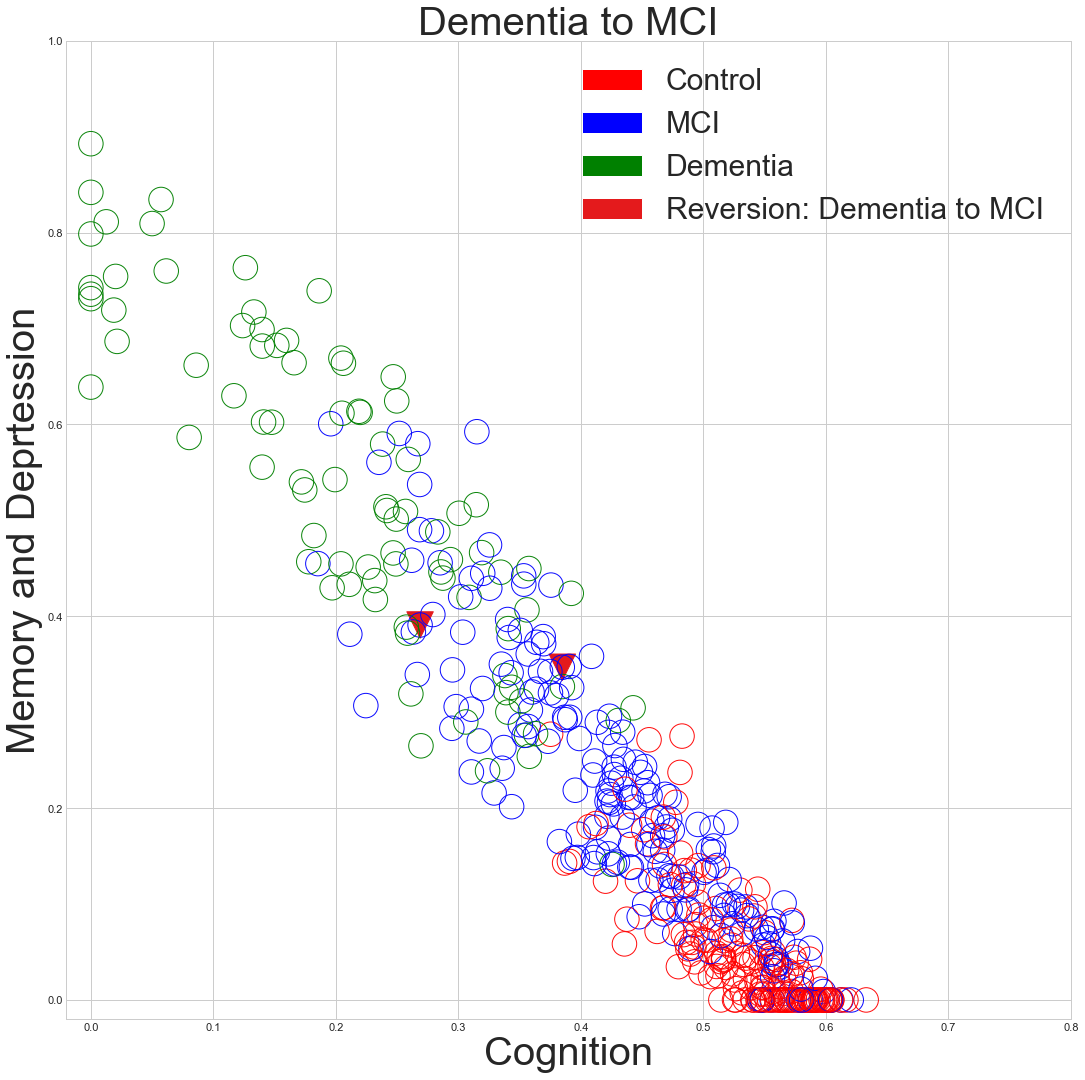

In [36]:
projections_reversions(redued_item_24,colors_categories_item_24, colors_categories_item_CN_MCI_DMN \
            ,list_of_colors,list_prog,list_replace, 'Dementia to MCI')

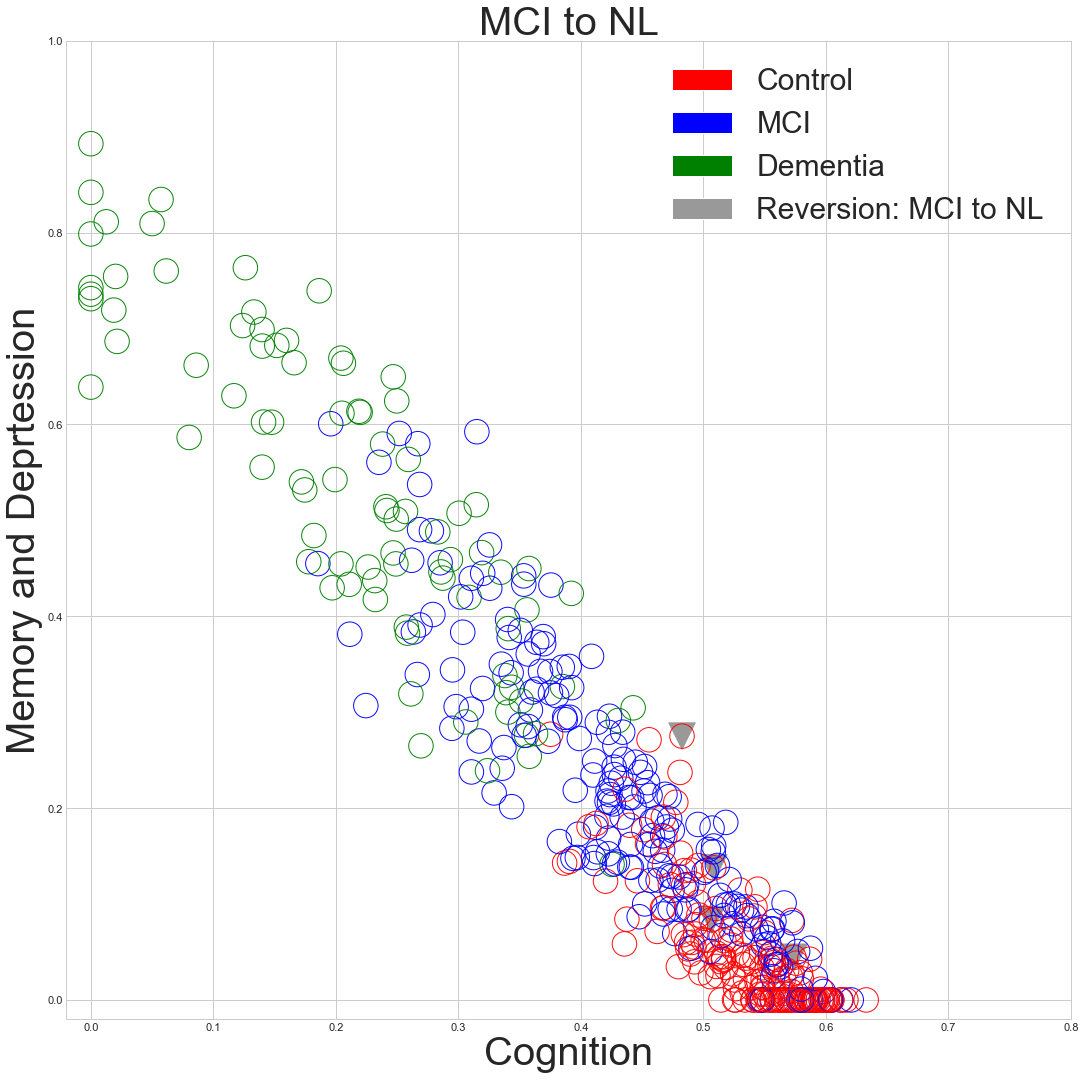

In [37]:
projections_reversions(redued_item_24,colors_categories_item_24, colors_categories_item_CN_MCI_DMN \
            ,list_of_colors,list_prog,list_replace, 'MCI to NL')

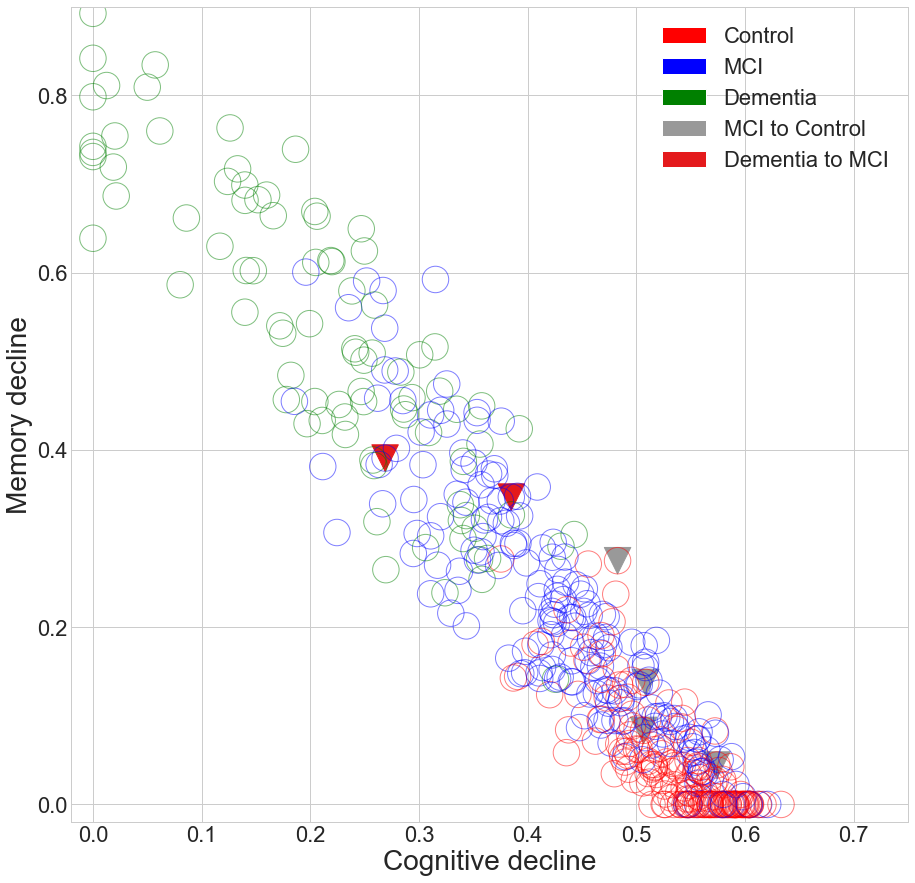

In [38]:
projections_two(redued_item_24,colors_categories_item_24, colors_categories_item_CN_MCI_DMN \
            ,list_of_colors,list_prog,list_replace)

#### Ploting distribution of control MCI and Dementia inprogression space

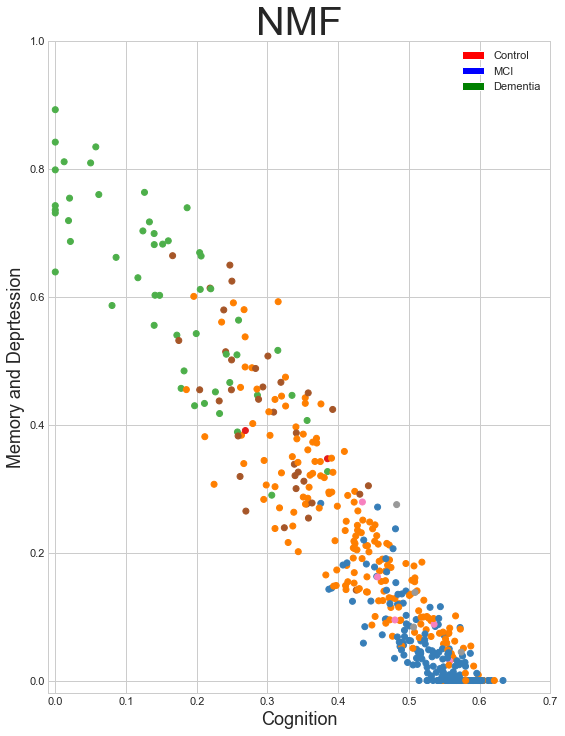

In [39]:
plt.figure(4, figsize=(9, 12))
plt.scatter(redued_item_24[['NMF_2_1']], redued_item_24[['NMF_2_2']], c = colors_categories_item_24.T.squeeze())
t = 'only-three'
plt.title('NMF')
if t == 'all':
    p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
    p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
    p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
    p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
    p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
    p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
    p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
    p8 = plt.Rectangle((0, 0), 0.1, 0.1, fc='cyan')
    p9 = plt.Rectangle((0, 0), 0.1, 0.1, fc='magenta')
    plt.legend((p1, p2, p3, p4, p5, p6, p7,p8,p9), ('Stable: NL', 'Stable: MCI', 'Stable: Dementia', 'Conversion: NL to MCI', 'Conversion: MCI to Dementia', 'Conversion: NL to Dementia', 'Reversion: MCI to NL','Reversion: Dementia to MCI','Reversion: Dementia to NL'), loc='best');
else:
    p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
    p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
    p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
    plt.legend((p1, p2, p3), ('Control', 'MCI', 'Dementia'), loc='best');    
    plt.legend((p1, p2, p3), ('Control', 'MCI', 'Dementia'), loc='best');    
plt.xlim((-.01, 0.7))
plt.ylim((-.02, 1.0)) 
plt.xlabel('Cognition', fontsize = 18)
plt.ylabel('Memory and Deprtession', fontsize = 18)
plt.title('NMF')
plt.grid(True)
plt.savefig(address + 'nmf_prog.png',dpi = 200)
plt.show()

In [40]:
list_months_to_be_considered = ['bl', 'm06','m12']
visits = 'm24'
redued_item_24, colors_categories_item_24, M_chosen_item_24,dignosis,list_of_colors ,list_prog, list_replace= project_list_of_colors(Max_intersection_dataset_item, visits, list_months_to_be_considered)
print('************************')
print('Number of observations :')
print(len(redued_item_24))
# print(redued_item_24['DXCHANGE'].unique())
print('************************')

************************
Number of observations :
453
************************


In [41]:
#VISUALISATIONS 
cols['adni_merge'] = ['RID', 'VISCODE','COLPROT','AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY']
adni_merge = pd.read_csv('ADNI\\Raw_Data\\Demographic_Plots\\ADNIMERGE.csv', usecols=cols['adni_merge'], index_col = ['RID'])
#The patient who visited again and again in different VISCODES, keeping only the first visit
adni_merge = adni_merge.groupby(adni_merge.index).min()
adni_merge_chosen = adni_merge[adni_merge.index.isin(redued_item_24.index)] #CHANGE HERE FOR DIFFERENT DATASETS 
result = pd.concat([adni_merge_chosen, redued_item_24] , axis = 1, ignore_index= False)

#### Ploting Age Distribution

In [42]:
c =  colors_categories_item_24_age.T.squeeze()
#NMF and age distinction for controls 
controls_nmf = redued_item_24[['NMF_2_1','NMF_2_2']].loc[c=='red']
controls_nmf_age = result['AGE'][controls_nmf.index] #Way 1 
#NMF and age distinction for MCI
mci_nmf = redued_item_24[['NMF_2_1','NMF_2_2']].loc[c=='blue']
mci_nmf_age = result['AGE'][mci_nmf.index] #Way 1 
#NMF and age distinction for Dimentia
dimentia_nmf = redued_item_24[['NMF_2_1','NMF_2_2']].loc[c=='green']
dimentia_nmf_age = result['AGE'][dimentia_nmf.index] #Way 1 

Age distribution in controls


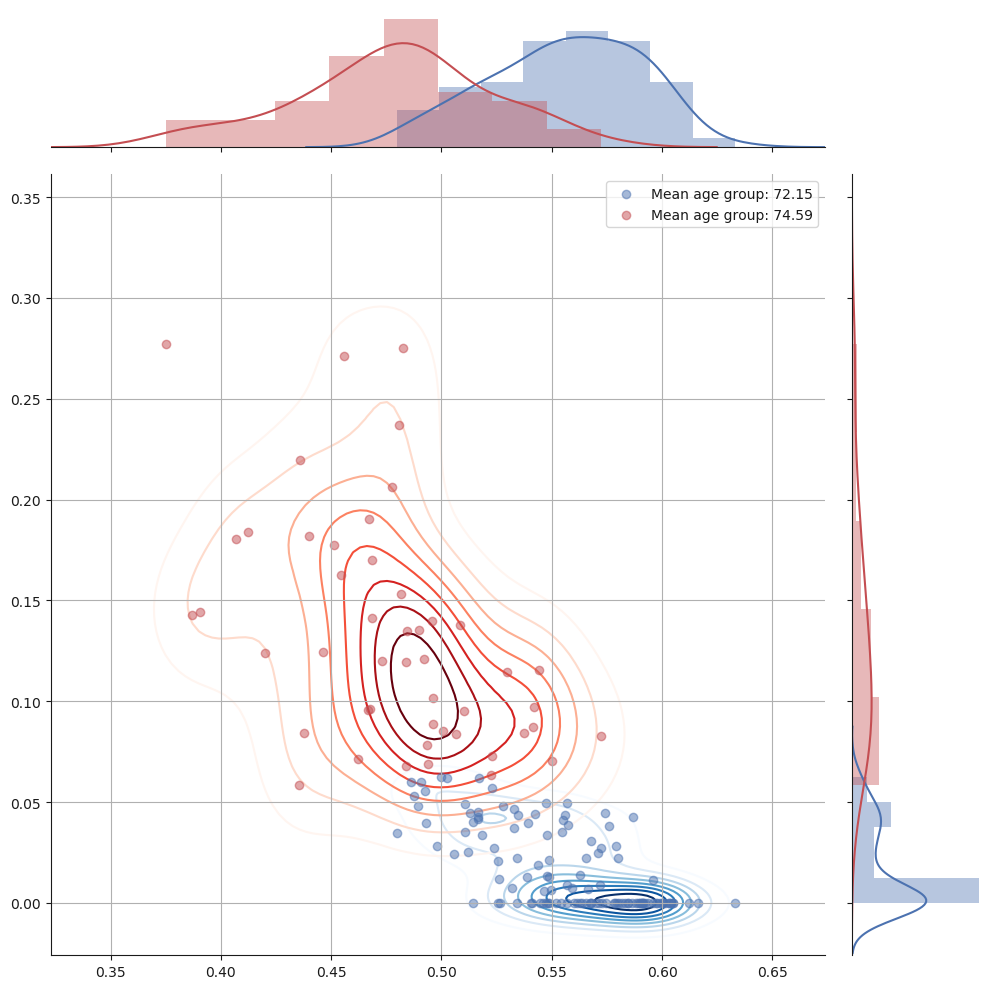

In [43]:
model_gmm = mixture.GaussianMixture(n_components=2, covariance_type='full',  random_state = 0)
model_gmm.fit(controls_nmf) 
Predict_gmm = pd.DataFrame(model_gmm.predict(controls_nmf))
Predict_gmm.index = controls_nmf.index

a = pd.DataFrame(controls_nmf_age)
age1 = a[(Predict_gmm==1).values].mean()

a = pd.DataFrame(controls_nmf_age)
age2 = a[(Predict_gmm==0).values].mean()
 
#Considering controls_nmf
x_red = list(controls_nmf[(Predict_gmm==0).values]['NMF_2_1'].values) #Age    76.7
y_red = list(controls_nmf[(Predict_gmm==0).values]['NMF_2_2'].values)

x_blue = list(controls_nmf[(Predict_gmm==1).values]['NMF_2_1'].values) #Age    70.3
y_blue = list(controls_nmf[(Predict_gmm==1).values]['NMF_2_2'].values)

import matplotlib as mpl
mpl.style.use('default')

plt.ion()
plt.show()
plt.pause(0.001)
a = 0.5
l = 10
zo = 0

p = sns.JointGrid(x = x_blue, y = y_blue, size=10)
p = p.plot_joint(plt.scatter, c="b", alpha = a)
p.plot_marginals(sns.distplot, color='b', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Blues")
p.x = x_red
p.y = y_red
p.plot_joint(plt.scatter, c="r", alpha = a)
plt.grid()
p.plot_marginals(sns.distplot, color='r', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Reds")
plt.legend(['Mean age group: ' + str(age1[0])[:5], 'Mean age group: ' + str(age2[0])[:5]])
print('Age distribution in controls')
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
#lt.legend((p1, p2), ('Young', 'Old'), loc='best',prop={'size':12});
plt.grid(True)
plt.savefig(address + 'age_m24_only_control'+ '.png',dpi = 200)
plt.show()

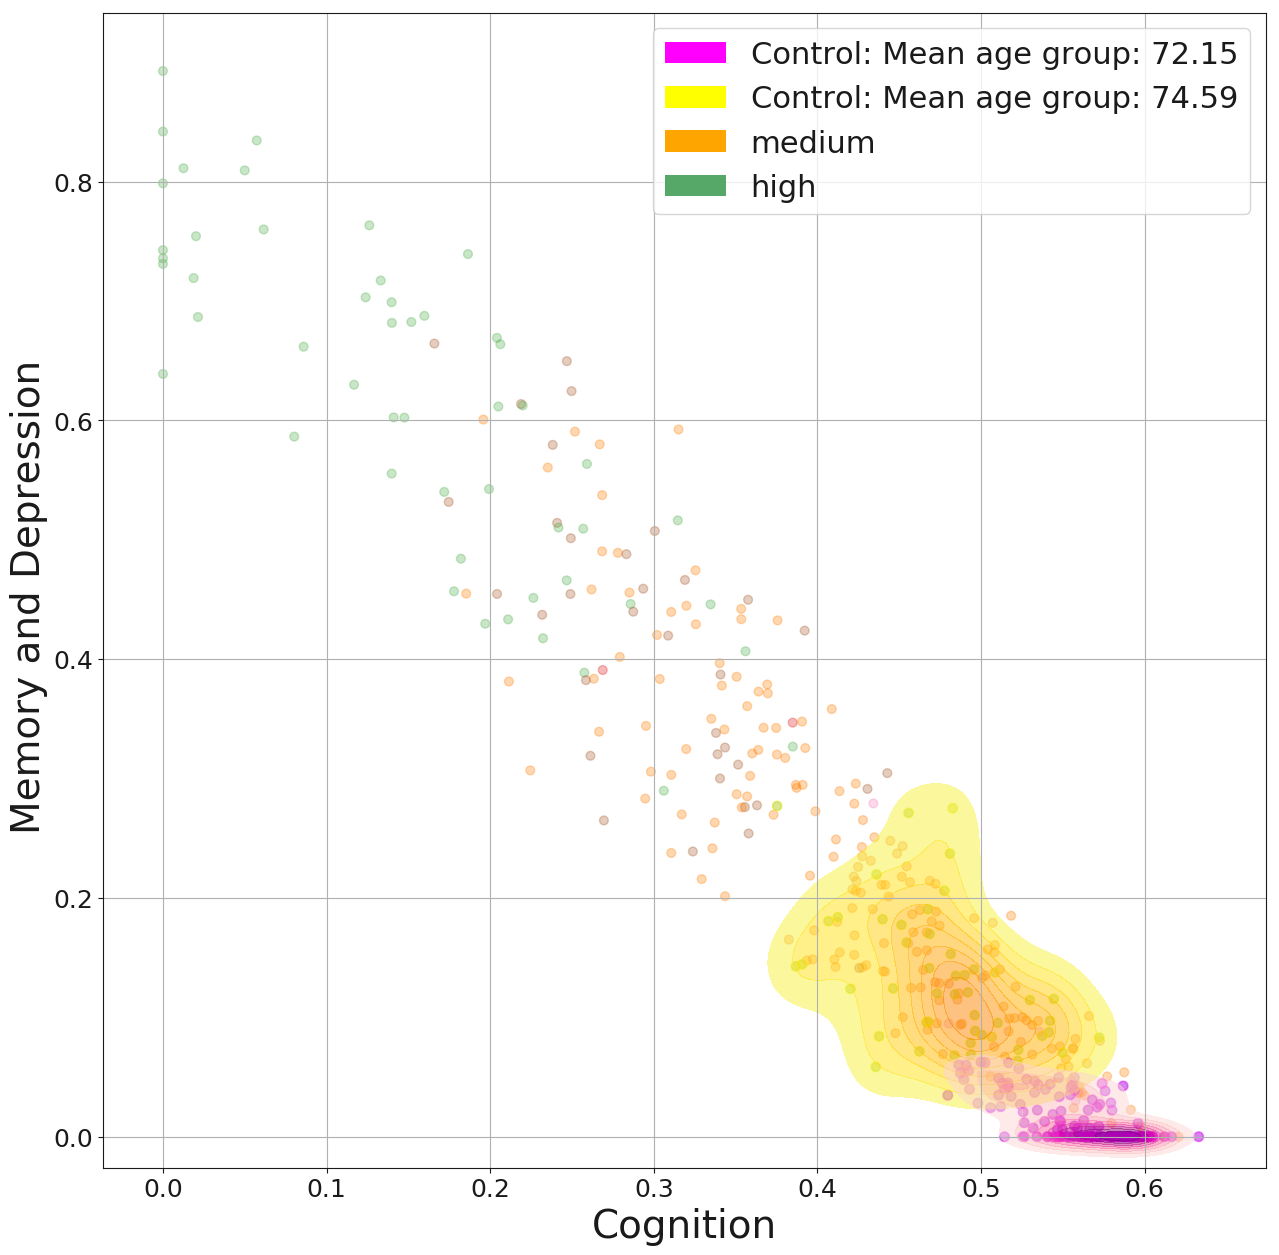

In [44]:
data = pd.concat( [controls_nmf, Predict_gmm], axis = 1)
mpl.rc('font', size= 18)
mpl.rc('axes', titlesize= 18)
f10 = plt.figure(figsize=(15,15))
ax3 = f10.add_subplot(1, 1, 1)
# f10.suptitle("Classification by Algorithm", fontsize = 18)
ax3.scatter(redued_item_24[['NMF_2_1']], redued_item_24[['NMF_2_2']], c = colors_categories_item_24, alpha=0.3, s = 40)
ax3.scatter(data['NMF_2_1'], data['NMF_2_2']  ,c = data[0].replace([0,1],['#ffff00','magenta'])  , alpha=0.4, s = 50)
ax3 = sns.kdeplot(  data[data[0] == 0]['NMF_2_1'], data[data[0] == 0]['NMF_2_2']  , cmap="Wistia" , alpha=0.5,shade=True,shade_lowest=False)
ax3 = sns.kdeplot(  data[data[0] == 1]['NMF_2_1'], data[data[0] == 1]['NMF_2_2']  , cmap="RdPu", alpha=0.5, shade=True,shade_lowest=False)
ax3.grid(True)
ax3.set_xlabel('Cognition', fontsize = 28)
ax3.set_ylabel('Memory and Depression ', fontsize = 28)
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc= 'magenta')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc= '#ffff00')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc= 'orange')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='g')
ax3.legend((p1,p2,p3,p4), ('Control: Mean age group: ' + str(age1[0])[:5] ,  'Control: Mean age group: ' + str(age2[0])[:5], 'medium','high' ), loc='best', fontsize = 22)
plt.grid(True)
plt.savefig(address +'\\paper_fig\\' + 'age_m24.png',dpi = 200)
plt.show()

#### Ploting APOE4 distribution

In [45]:
redued = redued_item_24
cols['apoe4'] = ['RID' , 'VISCODE' , 'APOE4'   ]
apoe4 = pd.read_csv("ADNI\\Raw_Data\\Demographic_Plots\\ADNIMERGE.csv",index_col='RID', usecols=cols['apoe4'])
apoe4['VISCODE2'] = apoe4['VISCODE']
apoe4['VISCODE'].value_counts()
del apoe4['VISCODE']
apoe4 = apoe4[apoe4['VISCODE2'].isin(['m24']) ]  

In [46]:
c =  colors_categories_item_24_age.T.squeeze()
#NMF and age distinction for controls 
controls_nmf = redued_item_24[['NMF_2_1','NMF_2_2']].loc[c=='red']
controls_nmf['APOE4'] = apoe4['APOE4'][controls_nmf.index] #Way 1 

#NMF and age distinction for MCI
mci_nmf = redued_item_24[['NMF_2_1','NMF_2_2']].loc[c=='blue']
mci_nmf ['APOE4'] = apoe4['APOE4'][mci_nmf.index] #Way 1 

#NMF and age distinction for Dimentia
dimentia_nmf = redued_item_24[['NMF_2_1','NMF_2_2']].loc[c=='green']
dimentia_nmf['APOE4'] = apoe4['APOE4'][dimentia_nmf.index] #Way 1 

In [47]:
controls_nmf = controls_nmf.append(dimentia_nmf).append(mci_nmf) #To combine MCI and dimentia both

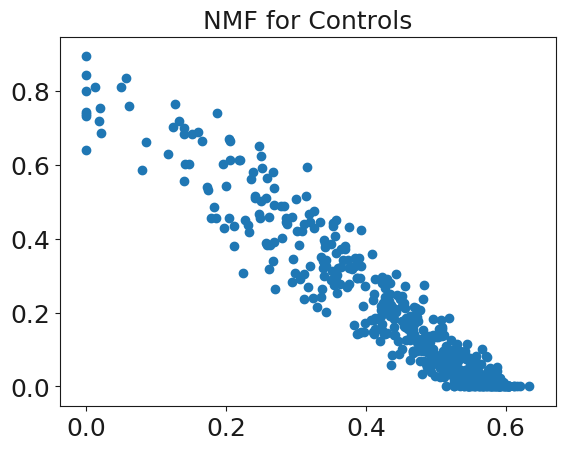

In [48]:
#NMF projection for only controls 
plt.scatter(controls_nmf.iloc[:,0], controls_nmf.iloc[:,1])
plt.title('NMF for Controls')
plt.show()

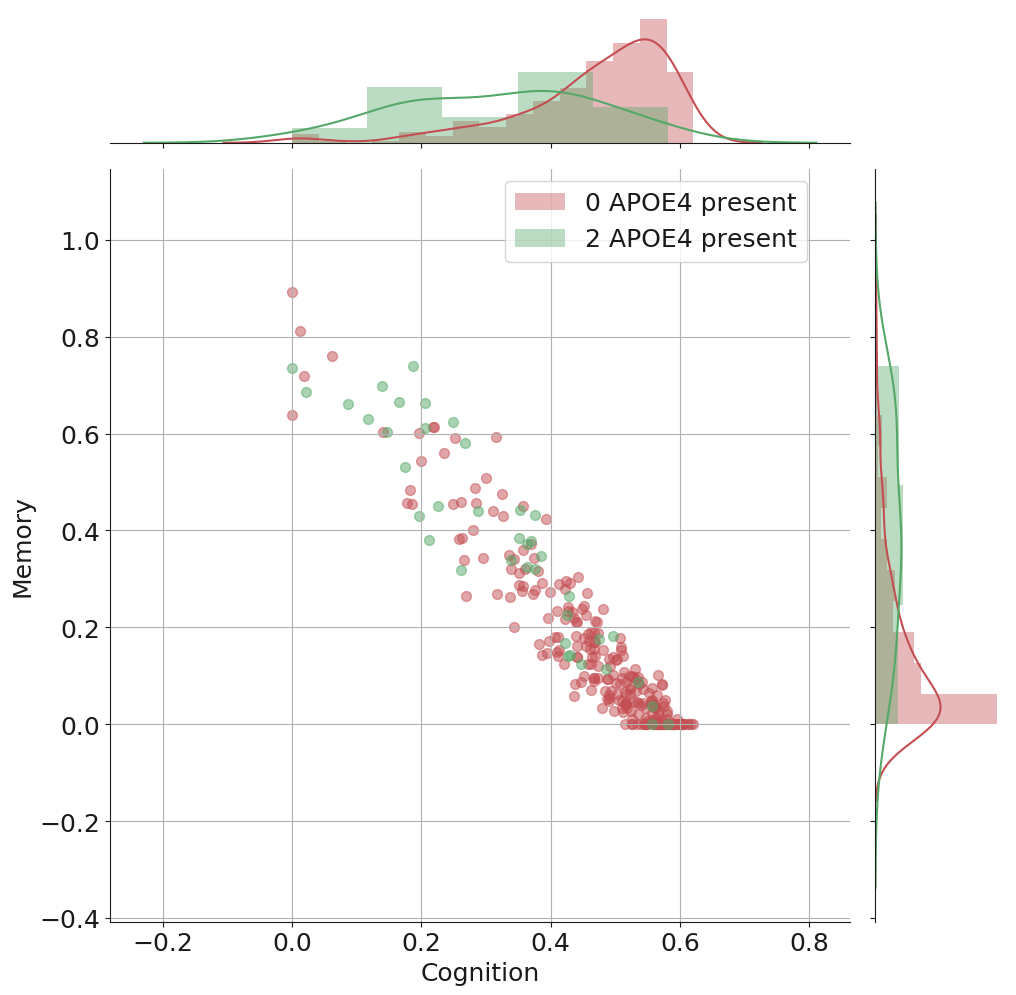

In [49]:
#Considering controls_nmf
x_red = list(controls_nmf[(controls_nmf['APOE4']==0).values]['NMF_2_1'].values) #Less than 75
y_red = list(controls_nmf[(controls_nmf['APOE4']==0).values]['NMF_2_2'].values)

x_blue = list(controls_nmf[(controls_nmf['APOE4']==1).values]['NMF_2_1'].values) #Greater than 75
y_blue = list(controls_nmf[(controls_nmf['APOE4']==1).values]['NMF_2_2'].values)

x_green = list(controls_nmf[(controls_nmf['APOE4']==2).values]['NMF_2_1'].values) #Greater than 75
y_green = list(controls_nmf[(controls_nmf['APOE4']==2).values]['NMF_2_2'].values)

'''
x_red = list(controls_nmf[(Predict_gmm==0).values]['NMF_2_1'].values) #Less than 75
y_red = list(controls_nmf[(Predict_gmm==0).values]['NMF_2_2'].values)

x_blue = list(controls_nmf[(Predict_gmm==1).values]['NMF_2_1'].values) #Greater than 75
y_blue = list(controls_nmf[(Predict_gmm==1).values]['NMF_2_2'].values)

x_green = list(controls_nmf[(Predict_gmm==2).values]['NMF_2_1'].values) #Greater than 75
y_green = list(controls_nmf[(Predict_gmm==2).values]['NMF_2_2'].values)
'''
plt.ion()
plt.show()
plt.pause(0.001)
a = 0.02
l = 10
zo = 0

p = sns.JointGrid(x = x_red, y = y_red , size=10)
p = p.plot_joint(plt.scatter, c="r", alpha = 0.5, s= 50)

p.plot_marginals(sns.distplot, color='r', axlabel=[])
#p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Reds")
'''
p = sns.JointGrid(x = x_red, y = y_red)
p = p.plot_joint(plt.scatter, c="r", alpha = a)

p.plot_marginals(sns.distplot, color='r', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Reds")
'''
'''
p.x = x_red
p.y = y_red
p.plot_joint(plt.scatter, c="r", alpha = a)
p.plot_marginals(sns.distplot, color='r', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Reds")
'''
p.x = x_green
p.y = y_green
p.plot_joint(plt.scatter, c="g", alpha = 0.5, s= 50)
plt.grid()
p.plot_marginals(sns.distplot, color='g', axlabel=[])
p.set_axis_labels(xlabel='Cognition', ylabel='Memory')
plt.legend(['0 APOE4 present', '2 APOE4 present'], loc = 'upper left',bbox_to_anchor=(-3.0, 1.0))
plt.savefig(address +'\\paper_fig\\' + 'apoe4_all_m24.png',dpi = 200)
plt.show()